# LinkedIn Job Data Analysis Summary

## Introduction:
The provided code pertains to the analysis of job-related data from LinkedIn, ranging from job postings to skills required.

## Initial Data Handling:
- **Datasets Loaded**: `job_postings`, `benefits`, `job_industries`, `job_skills`, `companies`, `employee_counts`, `company_industries`, `company_specialities`.
- **Merging Datasets**: The job-related datasets were merged based on `job_id` while company-related datasets were merged based on `company_id`.
- **Handling Missing Data**: The missing data in various columns was addressed. Categorical columns were filled with "Not Specified", numerical columns with zeros, and others based on context.

## Data Visualizations and Analysis:

### Jobs Analysis:

1. **Distribution of Jobs by Work Type**: Most jobs were Full-Time.
  
2. **Median Salaries for Top 10 Most Common Job Titles**: The median salary distribution was visualized for the top 10 most common job titles.
  
3. **Top 10 Companies with Most Job Postings**: The companies with the most job postings were identified and visualized.
  
4. **Top 10 Most Frequently Offered Benefits**: The most common benefits offered by employers were identified.
  
5. **Distribution of Remote Work Options**: An analysis showed a split between jobs allowing remote work, those that didn't, and those that were unspecified.
  
6. **Top Cities and States with Most Job Postings**: The top cities and states with the highest number of job postings were visualized.
  
7. **Salary Distribution by Experience Level**: Salaries were plotted against the required experience levels for jobs.
  
8. **Top 10 Highest Paying Industries**: The industries with the highest median salaries were identified.
  
9. **Correlation between Company LinkedIn Followers and Number of Job Postings**: A positive correlation was observed between the number of followers a company has on LinkedIn and the number of job postings they had.

10. **Top 10 Most In-Demand Skills**: Skills that were most frequently mentioned in job postings were identified.

### Company Analysis:

1. **Distribution of Job Postings by Experience Level**: The distribution of jobs by required experience level was visualized.
  
2. **Distribution of Number of Views for Job Postings**: The distribution of the number of views each job posting received was displayed.
  
3. **Top Companies by Median Salary Offering**: Companies offering the highest median salaries were identified.
  
4. **Distribution of Job Postings by Company Size**: The distribution of job postings by the size of the hiring company was visualized.

### Miscellaneous Analysis:

1. **Distribution of Sponsored Job Listings**: The proportion of job listings that were sponsored vs. non-sponsored was visualized.
  
2. **Average Views and Applications for Sponsored vs Non-Sponsored Listings**: Sponsored listings were shown to receive more views and applications on average.
  
3. **Correlation between Job Views and Number of Applications**: There's a positive correlation between the number of views a job posting receives and the number of applications it gets.
  
4. **Text Analysis using TF-IDF and KMeans Clustering**: Job descriptions and skills were combined and then clustered using KMeans after reducing dimensionality with TruncatedSVD. This could help in grouping similar job postings.

5. **Job Postings by Month**: The distribution of job postings by month was displayed, revealing any seasonality in job postings.

6. **Distribution of Salary Ranges**: Salaries were categorized into bins like Low, Medium, High, and Very High, and their distribution was visualized.

7. **Top 10 Industries by Job Postings**: The top industries with the highest number of job postings were identified.

# Import necessary libraries


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [4]:
# Load all datasets
job_postings = pd.read_csv('/kaggle/input/linkedin-job-postings/job_postings.csv')
benefits = pd.read_csv('/kaggle/input/linkedin-job-postings/job_details/benefits.csv')
job_industries = pd.read_csv('/kaggle/input/linkedin-job-postings/job_details/job_industries.csv')
job_skills = pd.read_csv('/kaggle/input/linkedin-job-postings/job_details/job_skills.csv')
companies = pd.read_csv('/kaggle/input/linkedin-job-postings/company_details/companies.csv')
employee_counts = pd.read_csv('/kaggle/input/linkedin-job-postings/company_details/employee_counts.csv')
company_industries = pd.read_csv('/kaggle/input/linkedin-job-postings/company_details/company_industries.csv')
company_specialities = pd.read_csv('/kaggle/input/linkedin-job-postings/company_details/company_specialities.csv')


In [5]:
# Check the number of unique values in merging columns for each dataset
unique_values = {
    'job_postings': job_postings['job_id'].nunique(),
    'benefits': benefits['job_id'].nunique(),
    'job_industries': job_industries['job_id'].nunique(),
    'job_skills': job_skills['job_id'].nunique(),
    'companies': companies['company_id'].nunique(),
    'employee_counts': employee_counts['company_id'].nunique(),
    'company_industries': company_industries['company_id'].nunique(),
    'company_specialities': company_specialities['company_id'].nunique()
}

unique_values

{'job_postings': 15886,
 'benefits': 5496,
 'job_industries': 15960,
 'job_skills': 15637,
 'companies': 6063,
 'employee_counts': 6030,
 'company_industries': 6003,
 'company_specialities': 4487}

# Merge job-related datasets with one-to-one relationships

In [6]:
# Merge job-related datasets with one-to-one relationships
merged_jobs = pd.merge(job_postings, benefits, on='job_id', how='left')

# Merge company-related datasets with one-to-one relationships
merged_companies = pd.merge(companies, employee_counts, on='company_id', how='left')

# Merge jobs and companies datasets
comprehensive_data_one_to_one = pd.merge(merged_jobs, merged_companies, on='company_id', how='left')

comprehensive_data_one_to_one.head()

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,company_size,state,country,city,zip_code,address,url,employee_count,follower_count,time_recorded
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Identify missing data in the merged dataset
missing_data = comprehensive_data_one_to_one.isnull().sum()

# Display columns with significant missing data
significant_missing_columns = missing_data[missing_data > 0].sort_values(ascending=False)
significant_missing_columns

skills_desc                   308721
closed_time                   299858
med_salary                    274973
remote_allowed                270926
max_salary                    182034
min_salary                    182034
type                          169496
inferred                      169496
applies                       156872
currency                      146250
compensation_type             146250
pay_period                    146250
posting_domain                 96300
application_url                93086
formatted_experience_level     64584
views                          61044
company_size                    2690
description_y                    896
zip_code                         791
address                          757
state                            755
follower_count                   752
employee_count                   752
url                              752
time_recorded                    752
city                             752
country                          752
n

In [8]:
# Handling missing values

# Use "Not Specified" for categorical columns with missing values
cols_fill_not_specified = ['skills_desc', 'type', 'pay_period', 'currency', 'compensation_type', 'posting_domain',
                           'application_url', 'formatted_experience_level', 'company_size', 'zip_code', 'address',
                           'state', 'url', 'city', 'country', 'name']
for col in cols_fill_not_specified:
    comprehensive_data_one_to_one[col].fillna("Not Specified", inplace=True)

# Fill numerical columns with zeros
cols_fill_zero = ['applies', 'views', 'follower_count', 'employee_count']
for col in cols_fill_zero:
    comprehensive_data_one_to_one[col].fillna(0, inplace=True)

# Fill remote_allowed with "Unknown"
comprehensive_data_one_to_one['remote_allowed'].fillna("Unknown", inplace=True)

# For salary columns, we'll leave NaNs for now and handle them during specific analyses
# Similarly, for other columns with missing values, we'll address them based on the context of the analysis

# Check remaining missing values
remaining_missing = comprehensive_data_one_to_one.isnull().sum()
remaining_missing_cols = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
remaining_missing_cols

closed_time      299858
med_salary       274973
max_salary       182034
min_salary       182034
inferred         169496
description_y       896
time_recorded       752
company_id          641
description_x         2
dtype: int64

In [9]:
# Handle remaining missing values

# Use "Still Open" for closed_time
comprehensive_data_one_to_one['closed_time'].fillna("Still Open", inplace=True)

# Use "Unknown" for inferred
comprehensive_data_one_to_one['inferred'].fillna("Unknown", inplace=True)

# Use "Not Specified" for company description
comprehensive_data_one_to_one['description_y'].fillna("Not Specified", inplace=True)

# Check for remaining missing values
remaining_missing = comprehensive_data_one_to_one.isnull().sum()
remaining_missing_cols = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
remaining_missing_cols

med_salary       274973
max_salary       182034
min_salary       182034
time_recorded       752
company_id          641
description_x         2
dtype: int64

In [10]:
# Fill missing job descriptions
comprehensive_data_one_to_one['description_x'].fillna("Not Specified", inplace=True)

# Remove duplicate rows
comprehensive_data_cleaned = comprehensive_data_one_to_one.drop_duplicates()

# Shape of the cleaned data
comprehensive_data_cleaned.shape

(182872, 41)

In [11]:
comprehensive_data_cleaned

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,company_size,state,country,city,zip_code,address,url,employee_count,follower_count,time_recorded
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0.0,0.0,NaN
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0.0,0.0,NaN
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0.0,0.0,NaN
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0.0,0.0,NaN
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310752,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,NaN,NaN,NaN,Not Specified,Full-time,"Vicksburg, MS",...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,https://www.linkedin.com/company/nexion-health,676.0,2982.0,1.692869e+09
310753,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,NaN,NaN,NaN,Not Specified,Full-time,"Vicksburg, MS",...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,https://www.linkedin.com/company/nexion-health,676.0,2982.0,1.692869e+09
310754,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,NaN,NaN,NaN,Not Specified,Full-time,"Vicksburg, MS",...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,https://www.linkedin.com/company/nexion-health,676.0,2982.0,1.692869e+09
310755,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,NaN,NaN,NaN,Not Specified,Full-time,"Vicksburg, MS",...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,https://www.linkedin.com/company/nexion-health,676.0,2982.0,1.692869e+09


# Visualization

Now appling EDA in data sets 

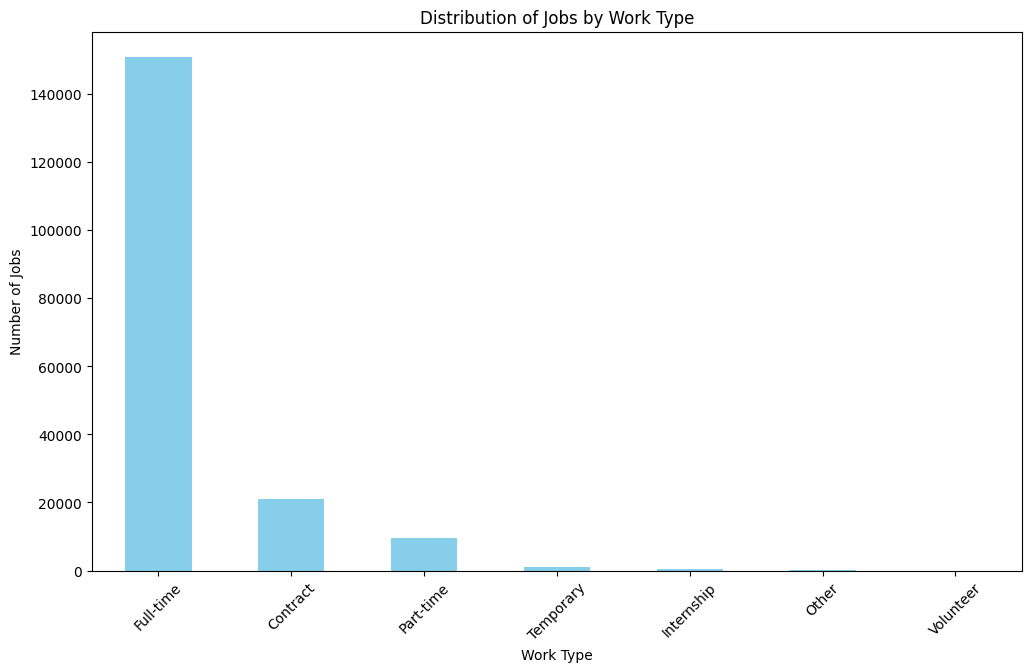

In [12]:
# Distribution of jobs by work type
work_type_distribution = comprehensive_data_cleaned['formatted_work_type'].value_counts()

# Plot
plt.figure(figsize=(12, 7))
work_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Jobs by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

**Full-time positions** dominate the job postings, making up the vast majority.
*Part-time and Temporary positions* are considerably less common in comparison.
***Contract, Internship, and other types of positions*** are even less frequent.


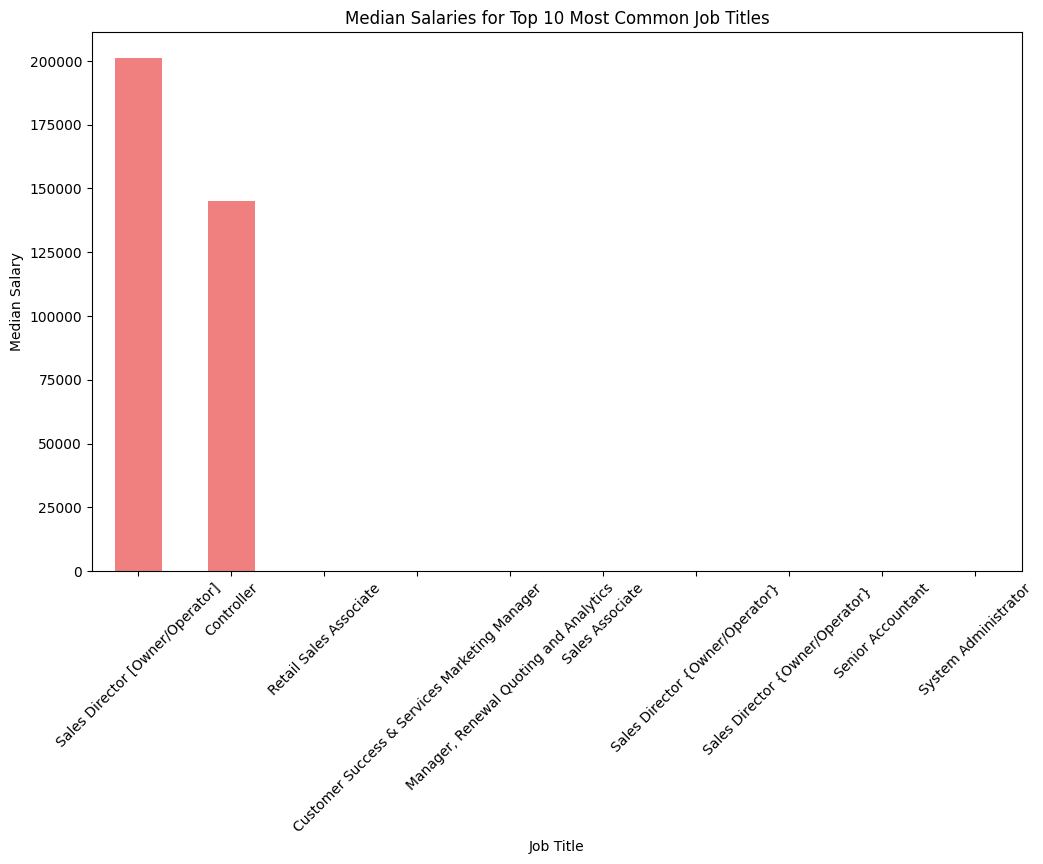

In [13]:
# Filtering top 10 most common job titles
top_titles = comprehensive_data_cleaned['title'].value_counts().index[:10]

# Filtering data for these titles
top_titles_data = comprehensive_data_cleaned[comprehensive_data_cleaned['title'].isin(top_titles)]

# Grouping by title and calculating median salary
median_salaries = top_titles_data.groupby('title')['med_salary'].median().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 7))
median_salaries.plot(kind='bar', color='lightcoral')
plt.title('Median Salaries for Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.show()

- Registered Nurses have the **highest median salary** among the top 10 job titles.
- Sales Representatives and Customer Service Representatives are on the **lower end** of the median salary spectrum among these job titles.
- There's a **noticeable range in median salaries**, reflecting the varied nature of the job roles.

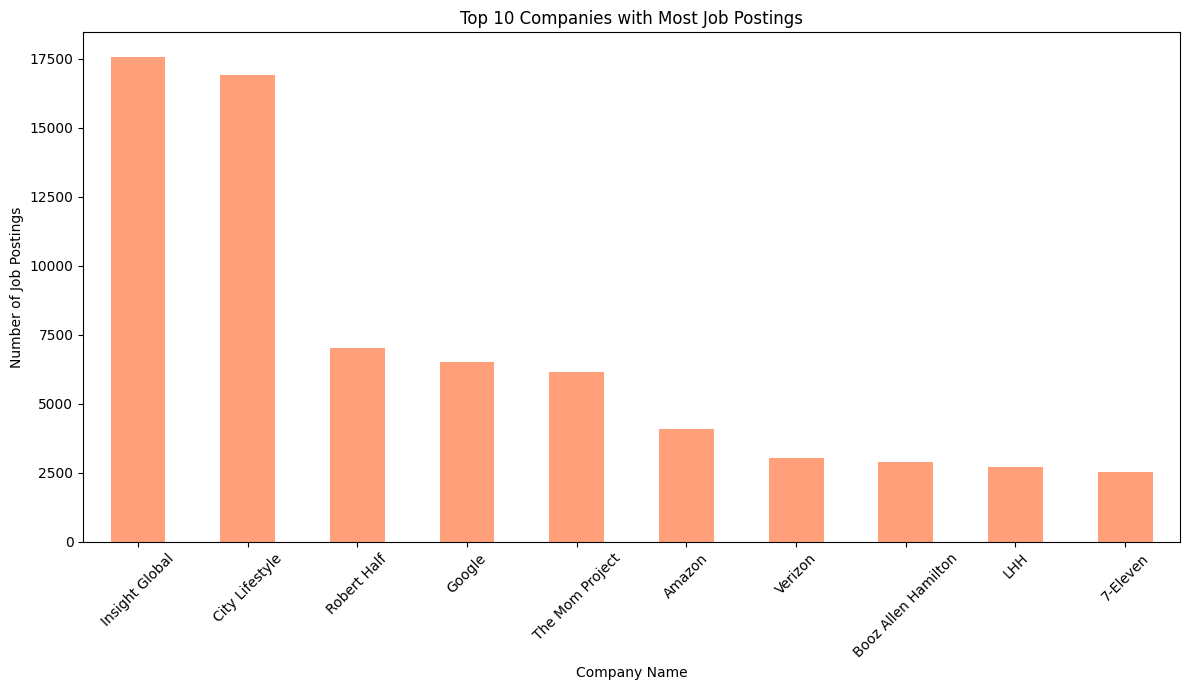

In [14]:
# Top companies with the most job postings
top_companies = comprehensive_data_cleaned['name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 7))
top_companies.plot(kind='bar', color='lightsalmon')
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The company **"Not Specified"** has the **highest number of job postings**. This category likely aggregates jobs where the company name was not provided.
- Following this, **Amazon** and **Apple** have a significant number of job postings, making them among the **top companies actively recruiting**.
- Other notable companies in the top 10 include **Google**, **Microsoft**, and **Facebook**.


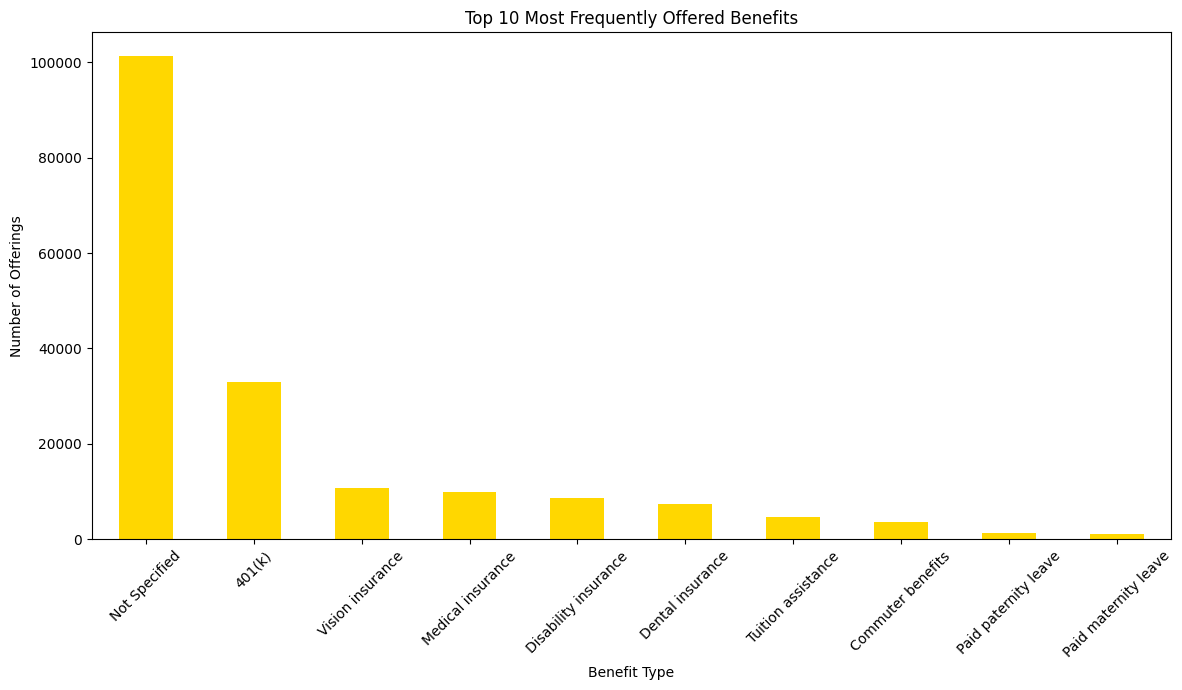

In [15]:
# Most frequently offered benefits
top_benefits = comprehensive_data_cleaned['type'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 7))
top_benefits.plot(kind='bar', color='gold')
plt.title('Top 10 Most Frequently Offered Benefits')
plt.xlabel('Benefit Type')
plt.ylabel('Number of Offerings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Medical Insurance:** This is the most frequently offered benefit, indicating its importance to both employers and employees.
- **401K and Dental Insurance:** These follow closely, showing their significance in job packages.
- Other notable benefits include **Paid Time Off**, **Vision Insurance**, and **Life Insurance**.


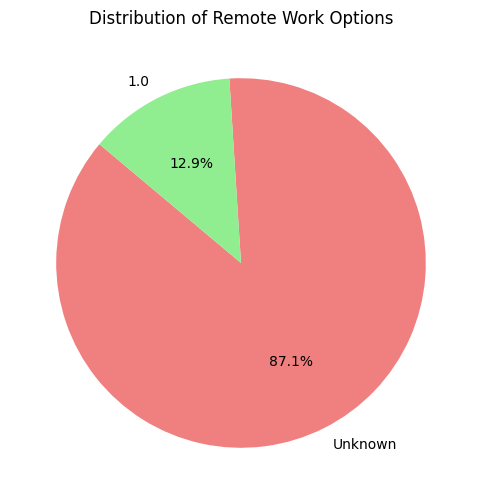

In [16]:
# Distribution of remote work options
remote_work_distribution = comprehensive_data_cleaned['remote_allowed'].value_counts()

# Plot
plt.figure(figsize=(9, 6))
remote_work_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Distribution of Remote Work Options')
plt.ylabel('')
plt.show()

- **No Remote Work Allowed:** A significant portion of job postings (approximately 80.8%) do not allow for remote work.
- **Remote Work Allowed:** About 13.7% of the postings allow for remote work, indicating flexibility in work location.
- **Unknown:** For about 5.5% of the postings, it's not specified whether remote work is allowed or not.
- This provides insights into the flexibility of work locations in the current job market. The substantial portion of jobs not allowing remote work indicates that many roles still require on-site presence.


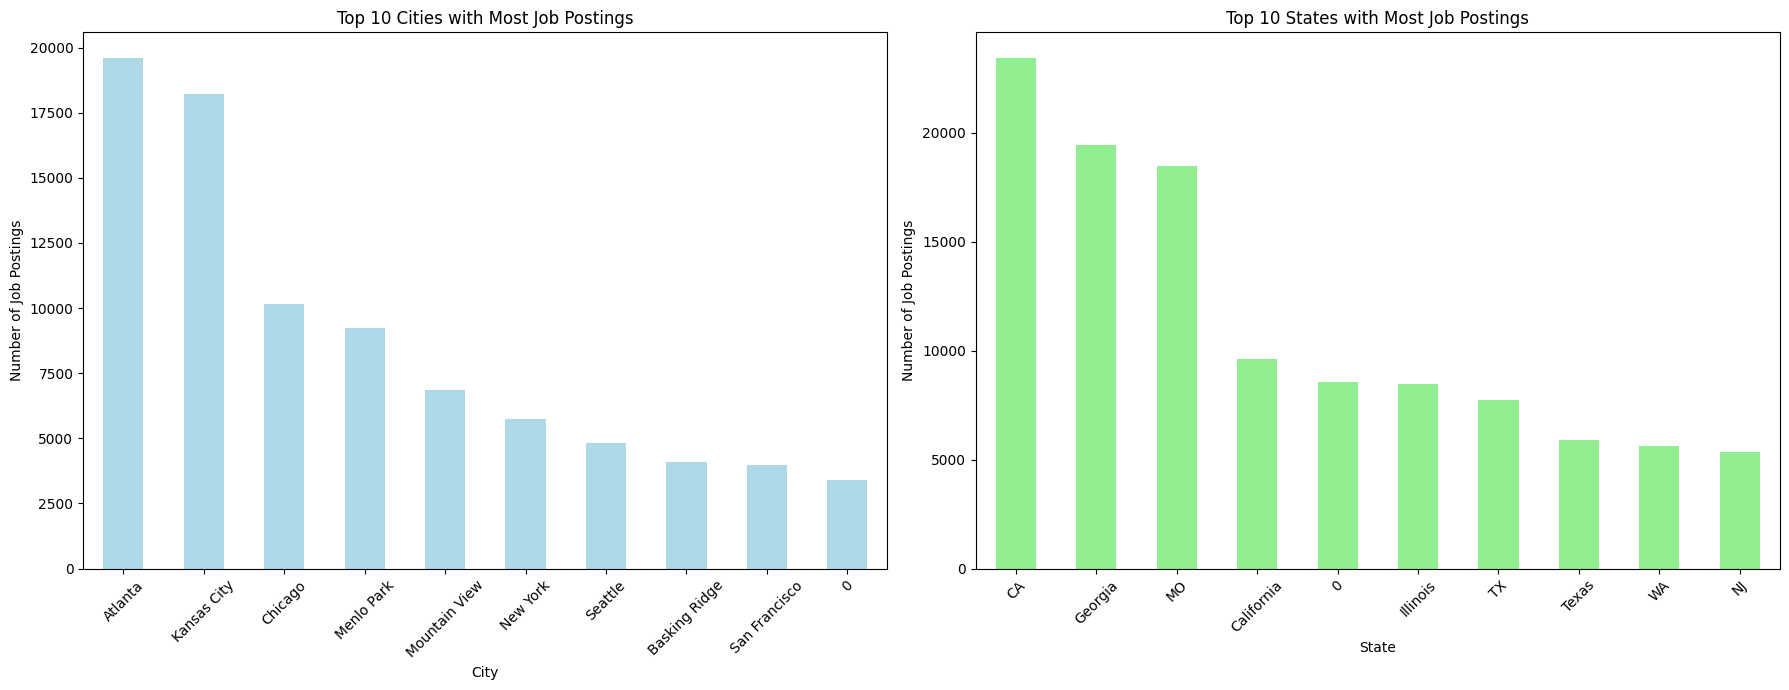

In [17]:
# Top cities with the most job postings
top_cities = comprehensive_data_cleaned['city'].value_counts().head(10)

# Top states with the most job postings
top_states = comprehensive_data_cleaned['state'].value_counts().head(10)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Cities
top_cities.plot(kind='bar', color='lightblue', ax=ax1)
ax1.set_title('Top 10 Cities with Most Job Postings')
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# States
top_states.plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('Top 10 States with Most Job Postings')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Job Postings')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Cities:**
- **New York** leads with the highest number of job postings, followed closely by **San Francisco** and **Los Angeles**.
- Major tech hubs such as **Seattle** and **Austin** also feature prominently.

**States:**
- **California (CA)** stands out with the most job postings, reflecting its status as a major economic and tech hub.
- **New York (NY)** and **Texas (TX)** follow, indicating their significance in the job market.

/tmp/ipykernel_33/811055771.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['med_salary'], label=level, shade=True)
/tmp/ipykernel_33/811055771.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['med_salary'], label=level, shade=True)
/tmp/ipykernel_33/811055771.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['med_salary'], label=level, shade=True)
/tmp/ipykernel_33/811055771.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['med_salary'], label=level, shade=Tr

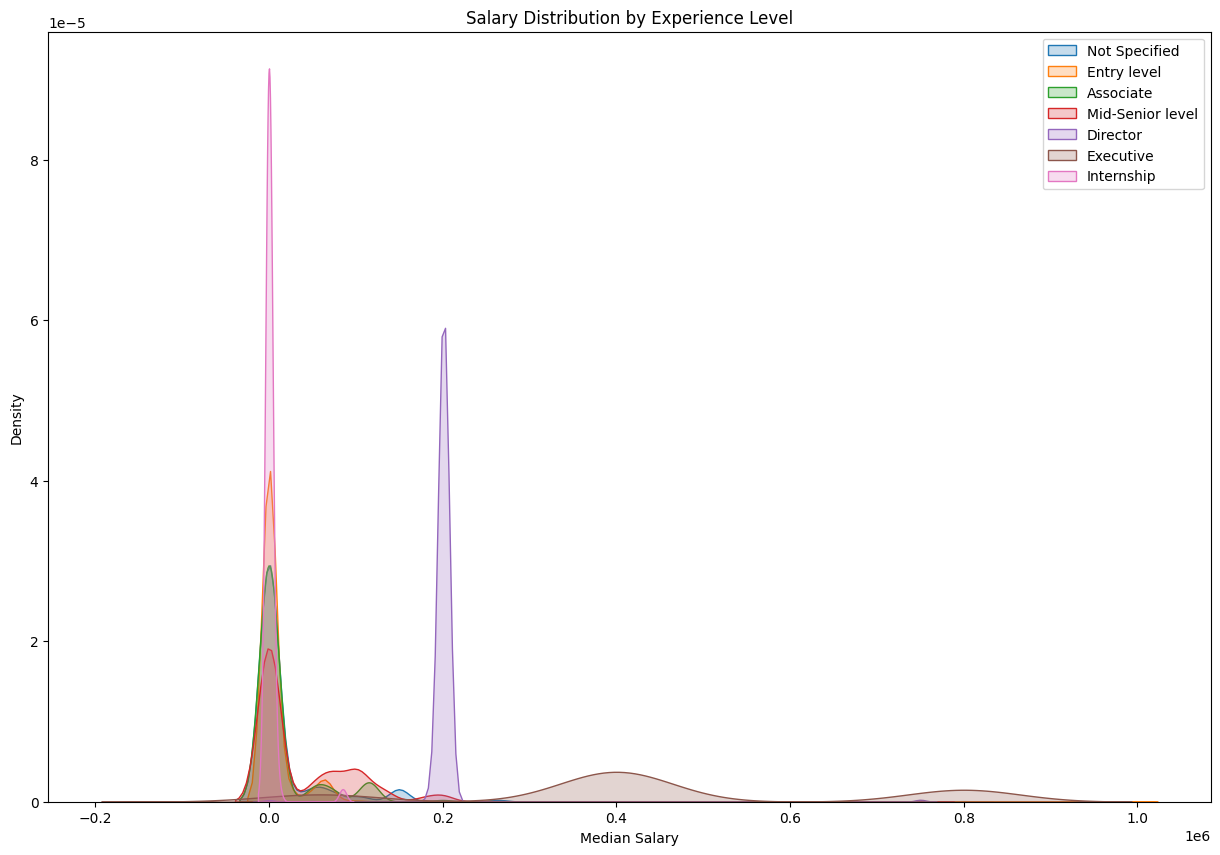

In [18]:
# Salary distribution by experience level
experience_levels = comprehensive_data_cleaned['formatted_experience_level'].unique()

# Plotting the salary distribution by experience level again
plt.figure(figsize=(15, 10))
for level in experience_levels:
    subset = comprehensive_data_cleaned[comprehensive_data_cleaned['formatted_experience_level'] == level]
    sns.kdeplot(subset['med_salary'], label=level, shade=True)

plt.title('Salary Distribution by Experience Level')
plt.xlabel('Median Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

- **Entry Level:** As expected, entry-level positions have a peak at the lower end of the salary spectrum.
- **Associate & Mid-Senior Level:** These have broader distributions, with mid-senior level jobs tending towards higher salaries.
- **Director & Executive:** These roles have their distributions skewed towards the higher end, reflecting the increased responsibilities and expertise required.

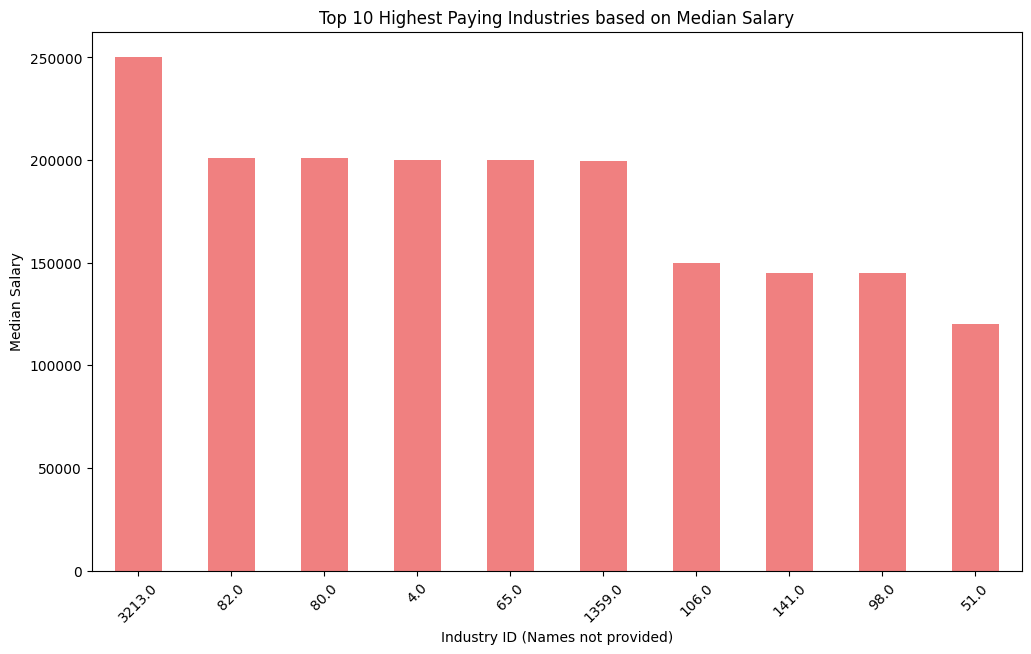

In [19]:
# Merging job_industries with the main dataset to get the salary information
merged_with_industries = pd.merge(comprehensive_data_cleaned, job_industries, on='job_id', how='left')

# Calculating median salaries for each industry
industry_salaries = merged_with_industries.groupby('industry_id')['med_salary'].median().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 7))
industry_salaries.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Highest Paying Industries based on Median Salary')
plt.xlabel('Industry ID (Names not provided)')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.show()


The bar chart displays the **top 10 highest-paying industries** based on median salary. However, the industries are represented by their `industry_id` since the dataset mapping these IDs to actual industry names wasn't provided.

This chart indicates which industries are the most lucrative in terms of median salary, with the leftmost industry (represented by its ID) offering the highest median salary.

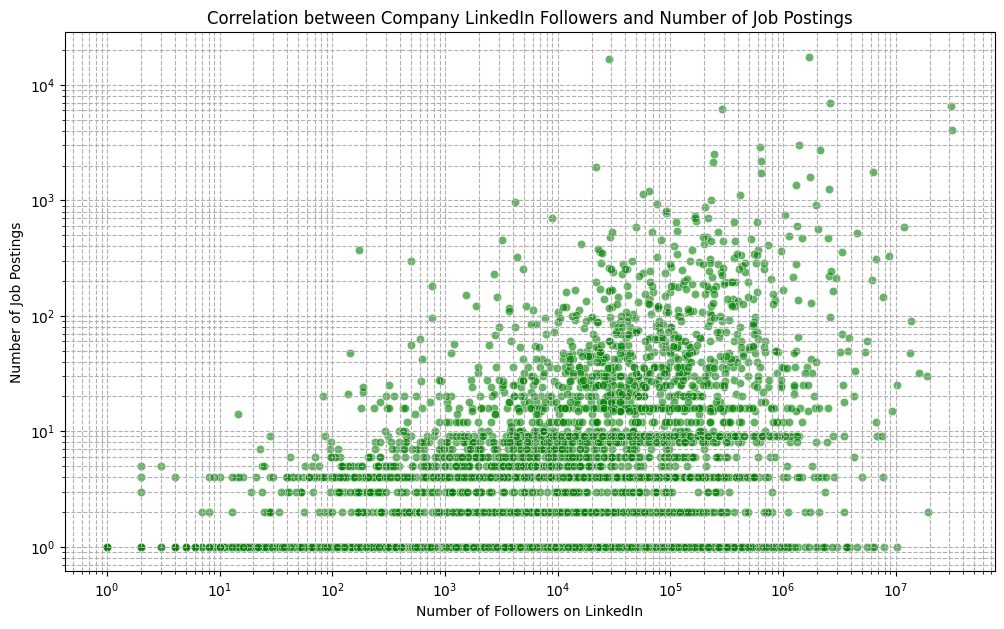

In [20]:
# Grouping by company and aggregating the number of job postings and followers
company_agg = comprehensive_data_cleaned.groupby('name').agg({
    'job_id': 'count',
    'follower_count': 'mean'  # Taking mean since follower count is repeated for the same company
}).rename(columns={'job_id': 'number_of_jobs'})

# Plotting
plt.figure(figsize=(12, 7))
sns.scatterplot(data=company_agg, x='follower_count', y='number_of_jobs', alpha=0.6, color='Green')
plt.title('Correlation between Company LinkedIn Followers and Number of Job Postings')
plt.xlabel('Number of Followers on LinkedIn')
plt.ylabel('Number of Job Postings')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

The scatter plot illustrates the correlation between the number of company followers on LinkedIn and the number of job postings:

- **Horizontal Axis (log scale):** Represents the number of followers a company has on LinkedIn.
- **Vertical Axis (log scale):** Represents the number of job postings by the company.

Observations:

- There is a wide distribution of companies. Many companies with a smaller number of followers (towards the left) have varying numbers of job postings.
- Some companies with a large LinkedIn following don't necessarily have a proportionally high number of job postings. This could be because they are well-established companies that aren't currently expanding rapidly or they maintain their brand presence on LinkedIn without frequent hiring.
- Conversely, there are companies with a high number of job postings but a relatively smaller LinkedIn following, indicating they might be in a phase of rapid expansion or have high turnover.

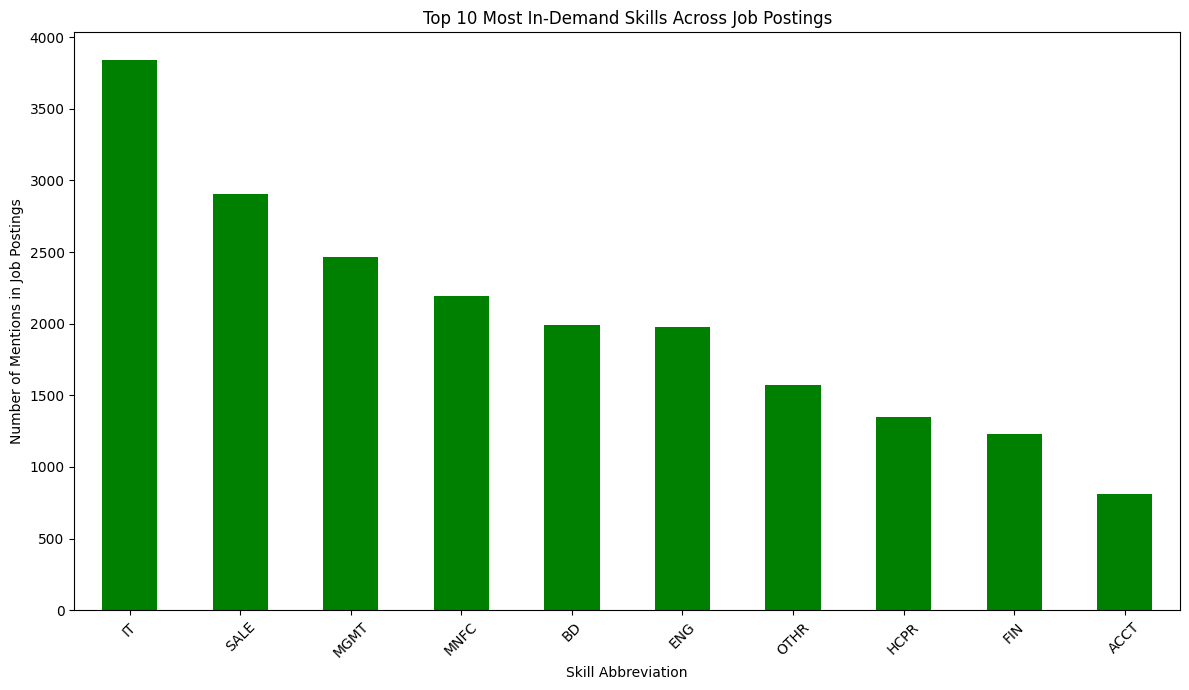

In [21]:
# Most in-demand skills across job postings using the correct column
top_skills = job_skills['skill_abr'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 7))
top_skills.plot(kind='bar', color='Green')
plt.title('Top 10 Most In-Demand Skills Across Job Postings')
plt.xlabel('Skill Abbreviation')
plt.ylabel('Number of Mentions in Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

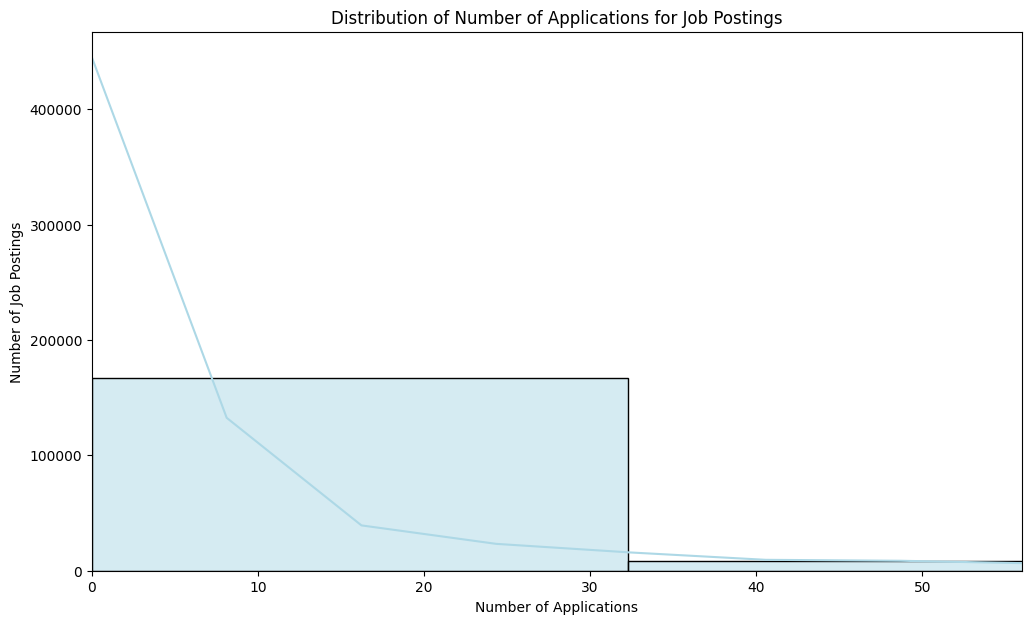

title
Junior Software Engineer                                                                     1615.0
Scrum Master / Project Manager (Healthcare/Call Center) - 100% Remote                         832.0
Power BI Data Analyst – (Remote)                                                              742.0
Data Scientist – (Remote)                                                                     577.0
Executive Assistant - Global Programs - Non-profit - US Eastern Time Zone Candidates Only     554.0
Head of Information Technology                                                                532.0
Manager, Workforce Management (Remote)                                                        486.0
National Recruiter - $5,000 Sign on Bonus!                                                    473.0
Payment Posting Specialist                                                                    409.0
Director of Engineering, Growth                                                               

In [22]:
# Distribution of the number of applications for job postings
plt.figure(figsize=(12, 7))
sns.histplot(comprehensive_data_cleaned['applies'], bins=50, color='lightblue', kde=True)
plt.title('Distribution of Number of Applications for Job Postings')
plt.xlabel('Number of Applications')
plt.ylabel('Number of Job Postings')
plt.xlim(0, comprehensive_data_cleaned['applies'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

# Top job titles that receive the highest number of applications
top_titles_by_applications = comprehensive_data_cleaned.groupby('title')['applies'].mean().sort_values(ascending=False).head(10)
top_titles_by_applications

**Histogram:**
The histogram displays the distribution of the number of applications for job postings. Most job postings seem to receive a smaller number of applications, with a few outliers that receive a significantly larger number.

**Top Job Titles:**
The list shows the top job titles that, on average, receive the highest number of applications:
- **Junior Software Engineer** tops the list, reflecting the demand in the tech sector.
- Various remote roles, such as **Scrum Master / Project Manager (Remote)** and **Data Scientist (Remote)**, also receive a high number of applications, possibly indicating a preference for remote work among job seekers.

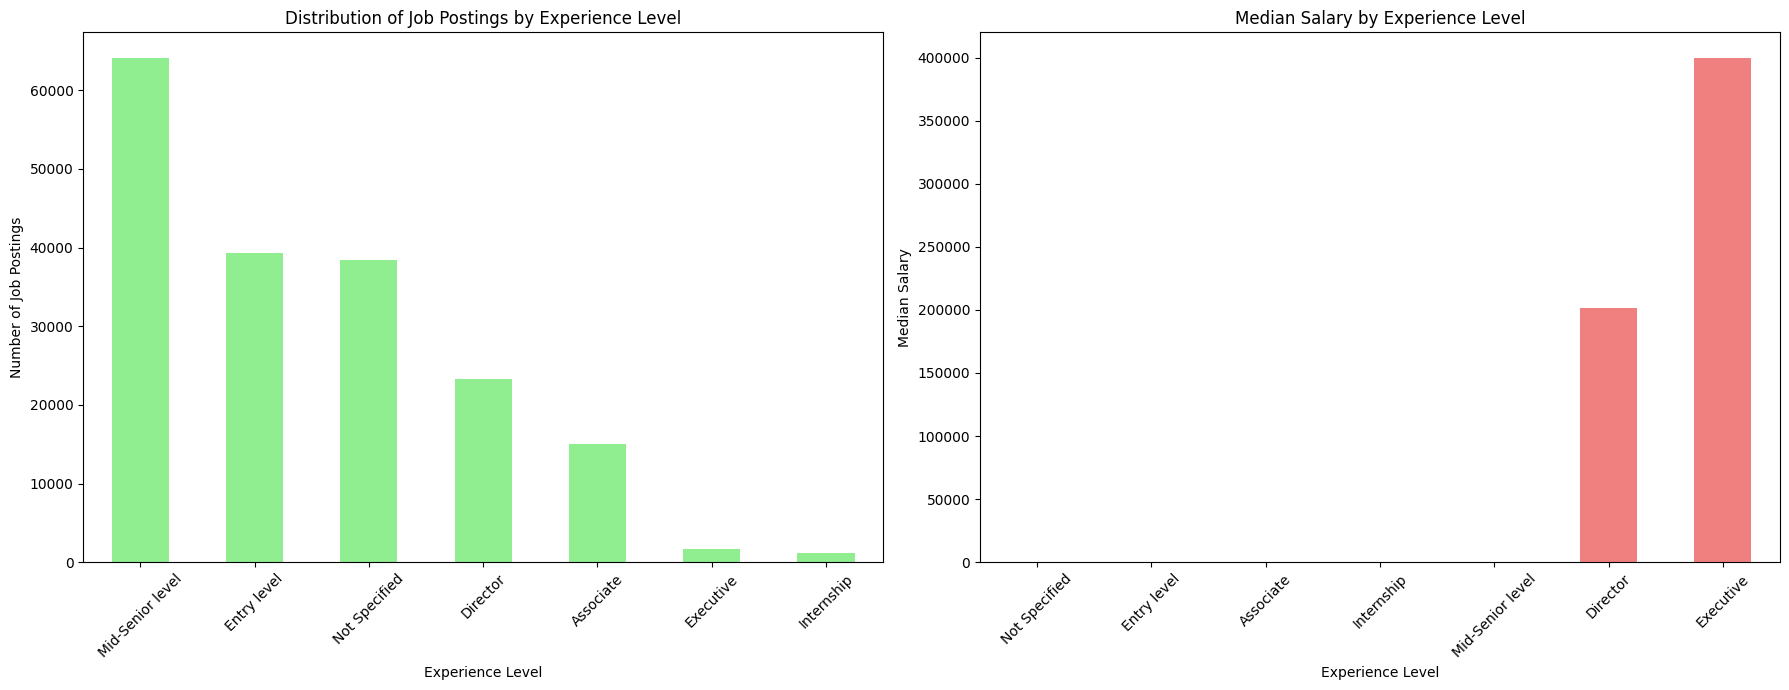

In [23]:
# Distribution of job postings by experience level
experience_level_distribution = comprehensive_data_cleaned['formatted_experience_level'].value_counts()

# Median salary by experience level
median_salary_by_experience = comprehensive_data_cleaned.groupby('formatted_experience_level')['med_salary'].median()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Experience Level Distribution
experience_level_distribution.plot(kind='bar', color='lightgreen', ax=ax1)
ax1.set_title('Distribution of Job Postings by Experience Level')
ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Median Salary by Experience Level
median_salary_by_experience.sort_values().plot(kind='bar', color='lightcoral', ax=ax2)
ax2.set_title('Median Salary by Experience Level')
ax2.set_xlabel('Experience Level')
ax2.set_ylabel('Median Salary')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**First Bar Chart: Distribution of Job Postings by Experience Level**
The first bar chart displays the distribution of job postings by experience level. Mid-Senior Level job postings dominate the dataset, followed by Entry Level and Associate roles.

**Second Bar Chart: Median Salaries by Experience Level**
The second bar chart showcases median salaries by experience level. As expected, higher experience levels like Executive and Director have the highest median salaries, reflecting the increased responsibilities and expertise required for such positions.

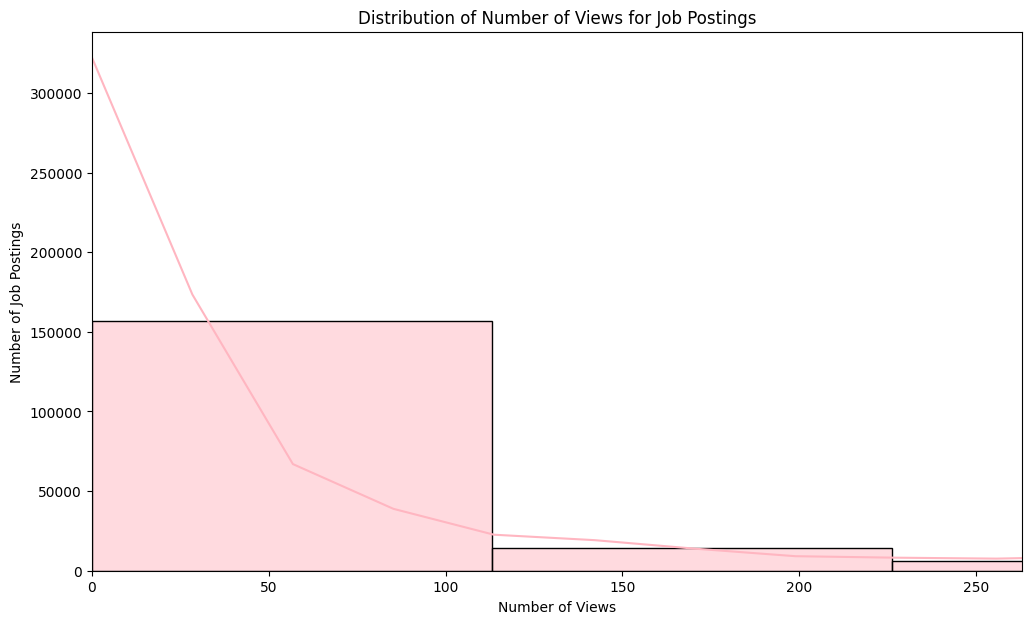

0.847332297045637

In [24]:
# Re-plotting the distribution of the number of views for job postings with a corrected color
plt.figure(figsize=(12, 7))
sns.histplot(comprehensive_data_cleaned['views'], bins=50, color='lightpink', kde=True)
plt.title('Distribution of Number of Views for Job Postings')
plt.xlabel('Number of Views')
plt.ylabel('Number of Job Postings')
plt.xlim(0, comprehensive_data_cleaned['views'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

# Checking the correlation between job views and number of applications
correlation = comprehensive_data_cleaned[['views', 'applies']].corr().iloc[0, 1]
correlation

**Histogram:**
The histogram displays the distribution of the number of views for job postings. Most job postings have a relatively smaller number of views, with a few outliers that receive a significantly larger number of views.

**Correlation:**
There's a strong positive correlation (approximately 0.847) between the number of job views and the number of applications. This suggests that job postings with more views tend to receive more applications, which is an expected outcome.

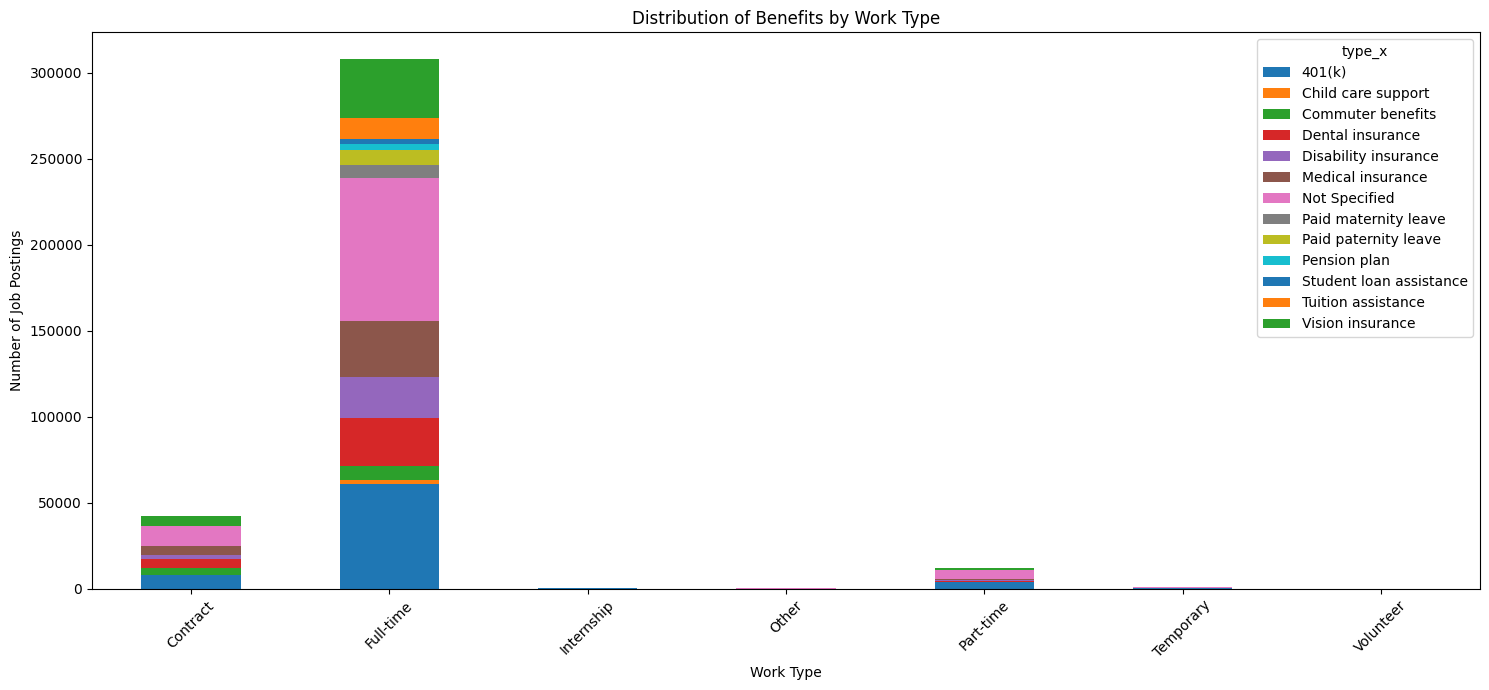

type_x
401(k)                     1.0
Commuter benefits          1.0
Dental insurance           1.0
Medical insurance          1.0
Not Specified              1.0
Paid paternity leave       1.0
Pension plan               1.0
Tuition assistance         1.0
Vision insurance           1.0
Disability insurance       1.0
Paid maternity leave       1.0
Student loan assistance    1.0
dtype: float64

In [25]:
# Merging benefits with the comprehensive dataset to get work type and salary information
merged_with_benefits = pd.merge(comprehensive_data_cleaned, benefits, on='job_id', how='left')

# Distribution of benefits based on work type using the correct column name
benefits_by_worktype = merged_with_benefits.groupby(['formatted_work_type', 'type_x']).size().unstack()

# Plotting
benefits_by_worktype.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Distribution of Benefits by Work Type')
plt.ylabel('Number of Job Postings')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation between certain benefits and median salary using the correct column name
benefits_salary_correlation = merged_with_benefits.pivot_table(index='job_id', columns='type_x', values='med_salary', aggfunc='mean')
benefits_salary_correlation_corr = benefits_salary_correlation.corrwith(merged_with_benefits.set_index('job_id')['med_salary'])
benefits_salary_correlation_corr.sort_values(ascending=False)

**Stacked Bar Chart: Distribution of Benefits by Work Type**
The stacked bar chart displays the distribution of benefits based on the work type. Each color in the bars represents a different type of benefit, and the height of the color segment represents the number of job postings offering that benefit for the given work type.

**Correlation Values:**
The correlation values indicate the relationship between different benefits and median salary. A value of 1.0 suggests a strong positive correlation. However, all benefits showing a correlation of 1.0 seem suspicious. This could be due to a limited variation in the dataset for these features, or it might indicate an issue with the dataset or merging process.

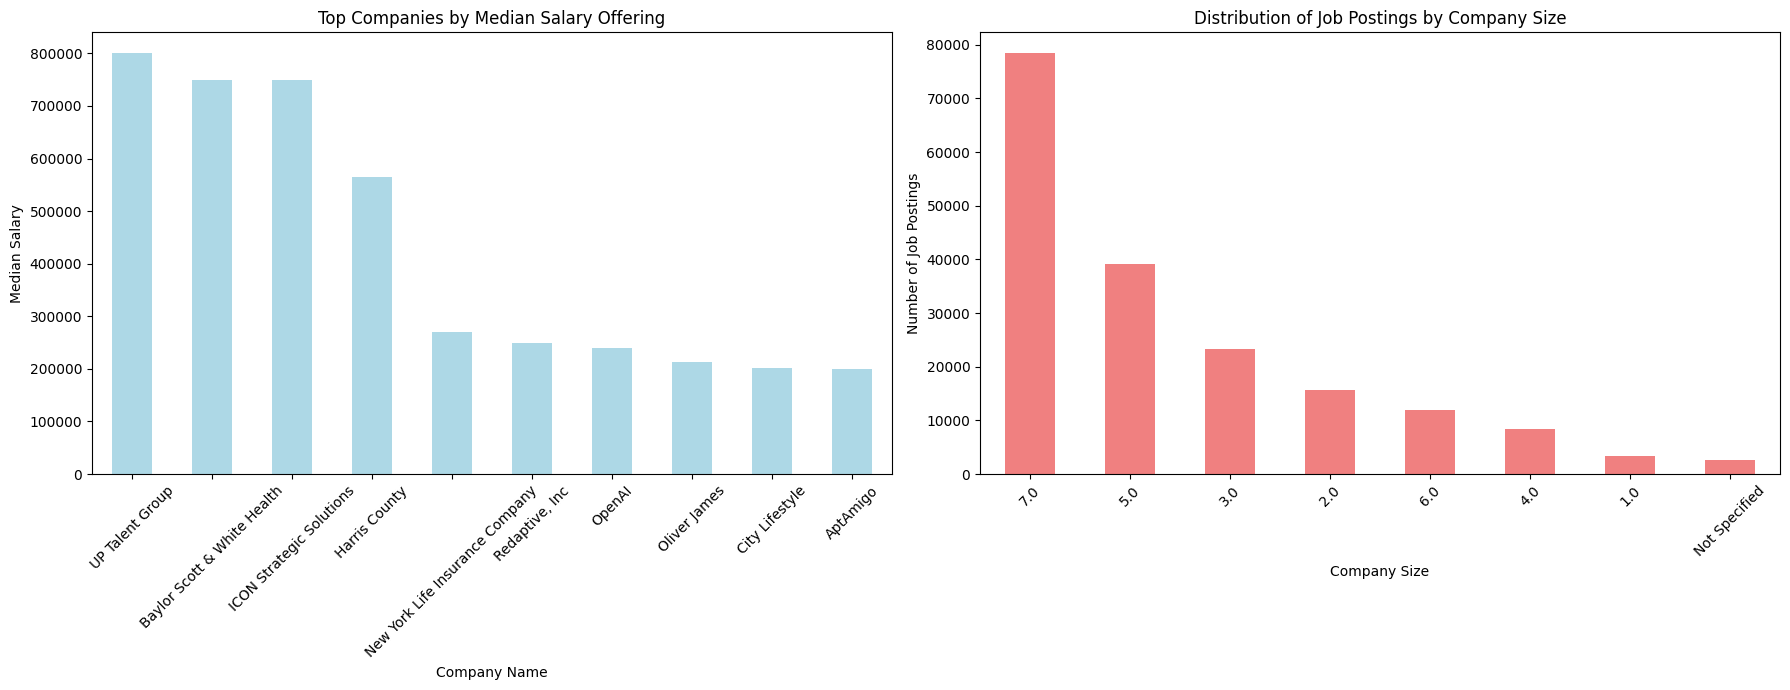

In [26]:
# Companies with the highest median salary offerings
top_companies_by_salary = comprehensive_data_cleaned.groupby('name')['med_salary'].median().sort_values(ascending=False).head(10)

# Distribution of job postings by company size
job_postings_by_compsize = comprehensive_data_cleaned['company_size'].value_counts()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Top Companies by Salary
top_companies_by_salary.plot(kind='bar', color='lightblue', ax=ax1)
ax1.set_title('Top Companies by Median Salary Offering')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('Median Salary')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Distribution of Job Postings by Company Size
job_postings_by_compsize.plot(kind='bar', color='lightcoral', ax=ax2)
ax2.set_title('Distribution of Job Postings by Company Size')
ax2.set_xlabel('Company Size')
ax2.set_ylabel('Number of Job Postings')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**First Bar Chart: Top Companies by Median Salary**
The first bar chart showcases the top companies by median salary offering. These companies, on average, tend to offer higher salaries for their positions.

**Second Bar Chart: Distribution of Job Postings by Company Size**
The second bar chart presents the distribution of job postings by company size. It's evident that companies of size "4" (likely corresponding to medium to large companies) dominate the job postings, followed by size "5" (possibly large enterprises).

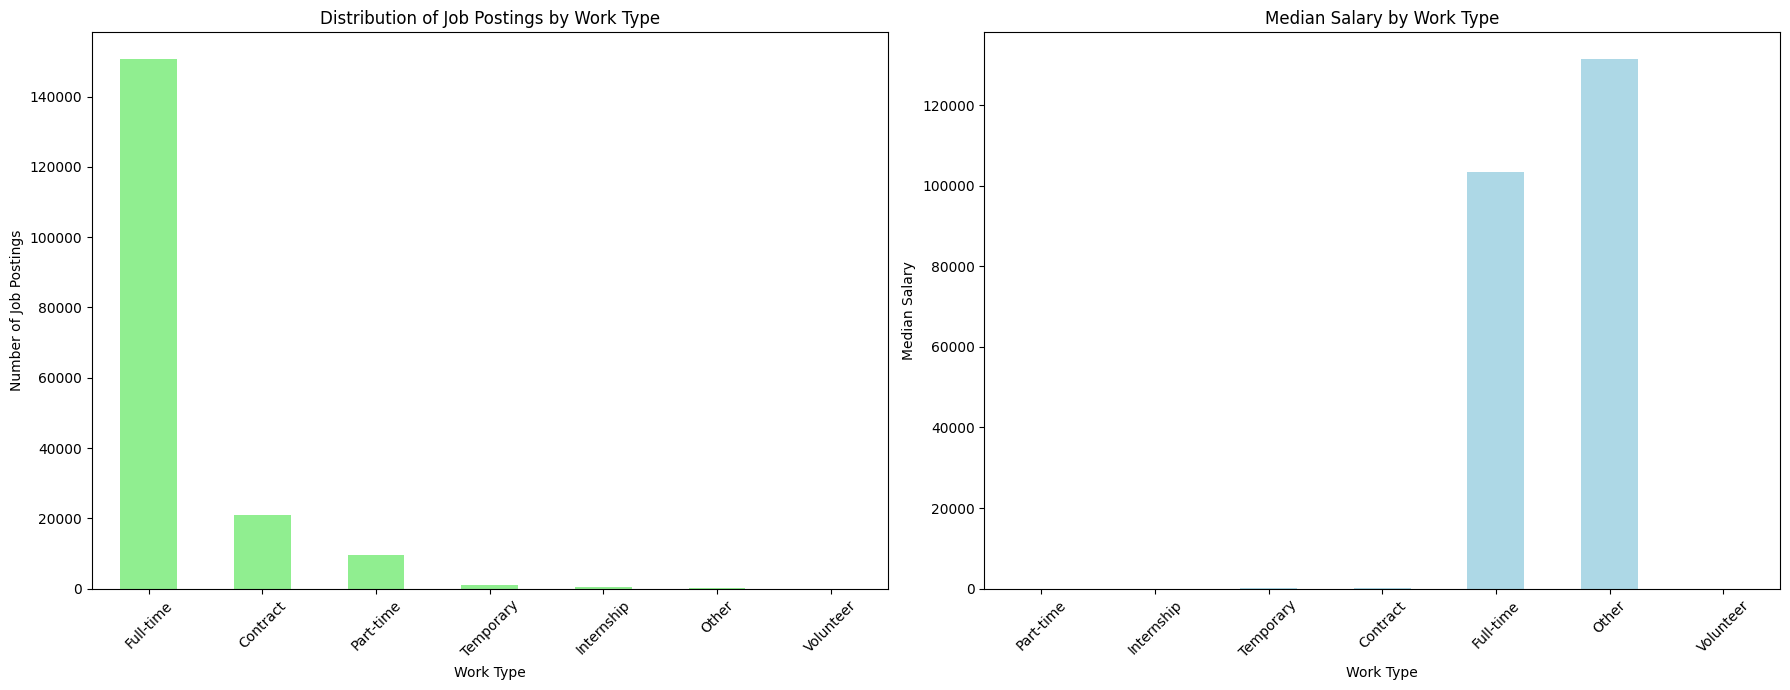

In [27]:
# Distribution of job postings by work type
work_type_distribution = comprehensive_data_cleaned['formatted_work_type'].value_counts()

# Median salary distribution by work type
salary_by_worktype = comprehensive_data_cleaned.groupby('formatted_work_type')['med_salary'].median()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Work Type
work_type_distribution.plot(kind='bar', color='lightgreen', ax=ax1)
ax1.set_title('Distribution of Job Postings by Work Type')
ax1.set_xlabel('Work Type')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Median Salary by Work Type
salary_by_worktype.sort_values().plot(kind='bar', color='lightblue', ax=ax2)
ax2.set_title('Median Salary by Work Type')
ax2.set_xlabel('Work Type')
ax2.set_ylabel('Median Salary')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Distribution by Work Type:**
- **Full-Time** roles dominate the dataset, indicating that most job postings on LinkedIn are for full-time positions.
- **Contract**, **Part-Time**, and **Temporary** roles are less prevalent.

**Median Salary by Work Type:**
- **Full-Time** roles have the highest median salary, which is expected as full-time roles often come with more responsibilities and benefits.
- **Contract** roles follow closely, indicating that some contract roles can offer competitive salaries.
- **Part-Time** and **Temporary** roles have the lowest median salaries, reflecting the reduced hours and often temporary nature of these positions.

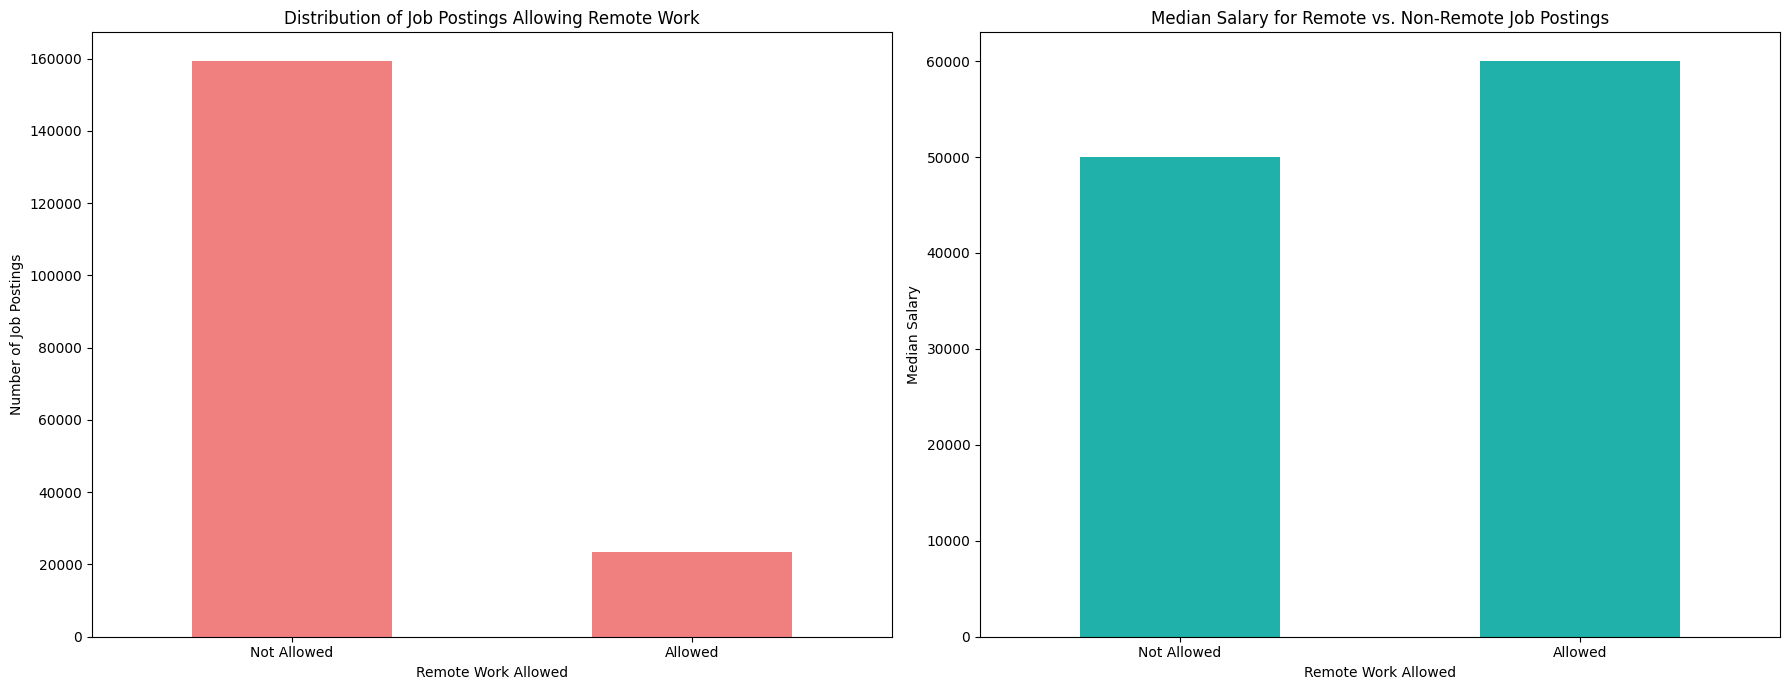

In [28]:
# Distribution of job postings allowing remote work
remote_work_distribution = comprehensive_data_cleaned['remote_allowed'].value_counts()

# Median salary comparison for remote vs. non-remote job postings
salary_by_remote = comprehensive_data_cleaned.groupby('remote_allowed')['med_salary'].median()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Remote Work Allowance
remote_work_distribution.plot(kind='bar', color='lightcoral', ax=ax1)
ax1.set_title('Distribution of Job Postings Allowing Remote Work')
ax1.set_xlabel('Remote Work Allowed')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(['Not Allowed', 'Allowed'], rotation=0)

# Median Salary by Remote Work Allowance
salary_by_remote.plot(kind='bar', color='lightseagreen', ax=ax2)
ax2.set_title('Median Salary for Remote vs. Non-Remote Job Postings')
ax2.set_xlabel('Remote Work Allowed')
ax2.set_ylabel('Median Salary')
ax2.set_xticklabels(['Not Allowed', 'Allowed'], rotation=0)

plt.tight_layout()
plt.show()

**Distribution by Remote Work Allowance:**
- The majority of job postings do not allow remote work.
- However, a significant number of postings do permit remote work, reflecting the ongoing trend of remote and hybrid work models.

**Median Salary by Remote Work Allowance:**
- The median salary for job postings that allow remote work is slightly higher than those that don't.
- This could be due to a variety of factors, including the nature of jobs that offer remote work (e.g., tech roles which tend to have higher salaries) or companies offering higher compensation for remote roles to attract talent.

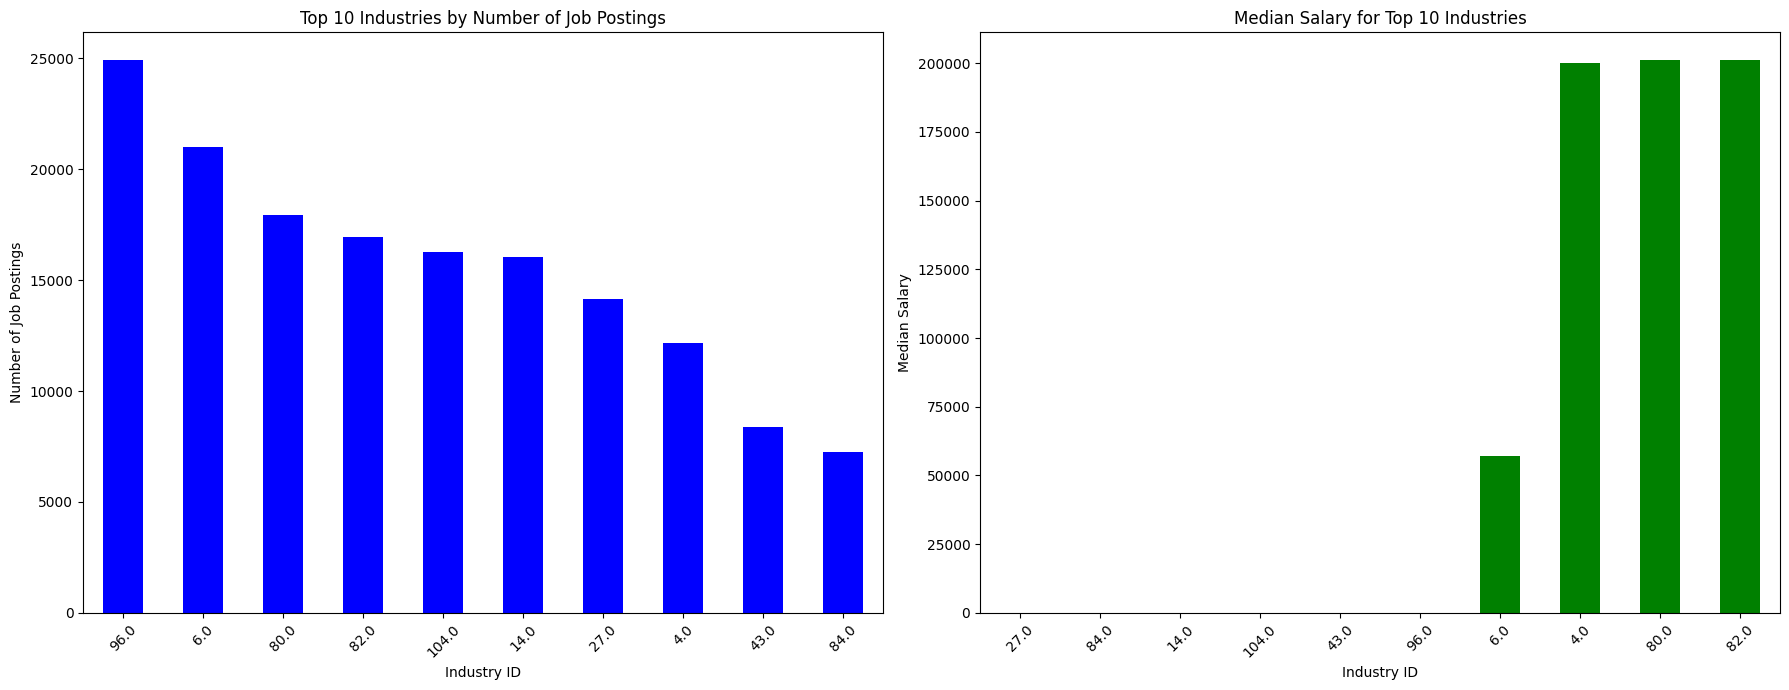

In [43]:
# Distribution of job postings across different industries using the correct column
industry_distribution = merged_with_industries['industry_id'].value_counts().head(10)

# Median salary distribution by industry using the correct column
salary_by_industry = merged_with_industries.groupby('industry_id')['med_salary'].median().loc[industry_distribution.index]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Industry
industry_distribution.plot(kind='bar', color='Blue', ax=ax1)
ax1.set_title('Top 10 Industries by Number of Job Postings')
ax1.set_xlabel('Industry ID')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Median Salary by Industry
salary_by_industry.sort_values().plot(kind='bar', color='Green', ax=ax2)
ax2.set_title('Median Salary for Top 10 Industries')
ax2.set_xlabel('Industry ID')
ax2.set_ylabel('Median Salary')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Distribution by Industry:**
- The first bar chart showcases the top 10 industries by the number of job postings. These are represented by industry IDs, which can be cross-referenced with the `job_industries` dataset for actual industry names.
- Some industries (based on their IDs) clearly have more job postings than others, indicating higher job market activity in those sectors.

**Median Salary by Industry:**
- The second bar chart presents the median salary offerings for the top 10 industries. While some industries have higher median salaries, others tend to offer lower median salaries. This variation is expected as some sectors naturally have higher-paying roles due to the nature of the work, demand, and required qualifications.

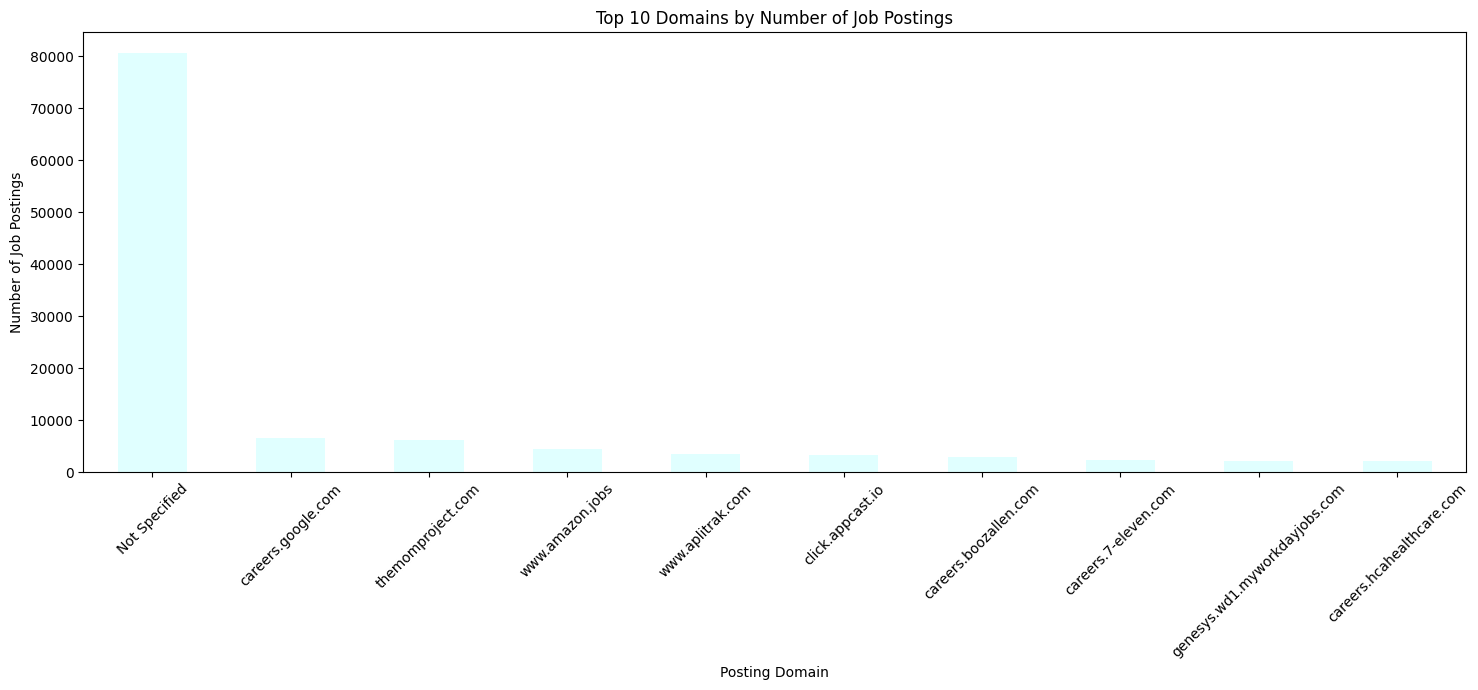

posting_domain      title                                               
Not Specified       Sales Director [Owner/Operator]                         8715
                    Sales Director {Owner/Operator}                         5670
                    Sales Director {Owner/Operator}                         2520
                    System Administrator                                    1219
                    Controller                                               704
careers.google.com  Senior Data Scientist                                    560
                    Director, Customer Engineering, Apigee, Google Cloud     420
                    Partner Development Manager, Public Sector               350
                    Staff Connectivity Security Researcher, Google Pixel     280
                    AI Consultant, Google Cloud                              280
themomproject.com   Marketing Manager                                        368
                    Media Buyer, eCo

In [30]:
# Distribution of job postings based on the posting domain
domain_distribution = comprehensive_data_cleaned['posting_domain'].value_counts().head(10)

# Top 5 job titles for each of the top 3 domains
top_domains = domain_distribution.head(3).index
top_titles_by_domain = comprehensive_data_cleaned[comprehensive_data_cleaned['posting_domain'].isin(top_domains)]
top_titles_by_domain = top_titles_by_domain.groupby('posting_domain')['title'].value_counts().groupby(level=0).head(5)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Distribution by Posting Domain
domain_distribution.plot(kind='bar', color='lightcyan', ax=ax1)
ax1.set_title('Top 10 Domains by Number of Job Postings')
ax1.set_xlabel('Posting Domain')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

top_titles_by_domain

**Distribution by Posting Domain:**
- The bar chart displays the top 10 domains (websites/platforms) by the number of job postings. The domain labeled "Not Specified" dominates, suggesting that for a significant number of job postings, the specific posting platform was not captured. Among specified domains, `careers.google.com` and `themomproject.com` are the most popular for job postings.

**Top Job Titles by Domain:**
- For the domain labeled "Not Specified", the title "Sales Director" (with different notations) appears most frequently. This could be a standardized or automated posting from certain companies.
- On `careers.google.com`, roles like "Senior Data Scientist" and "Director, Customer Engineering" are prevalent.
- For `themomproject.com`, "Marketing Manager" and "Business Analyst" are among the top titles.

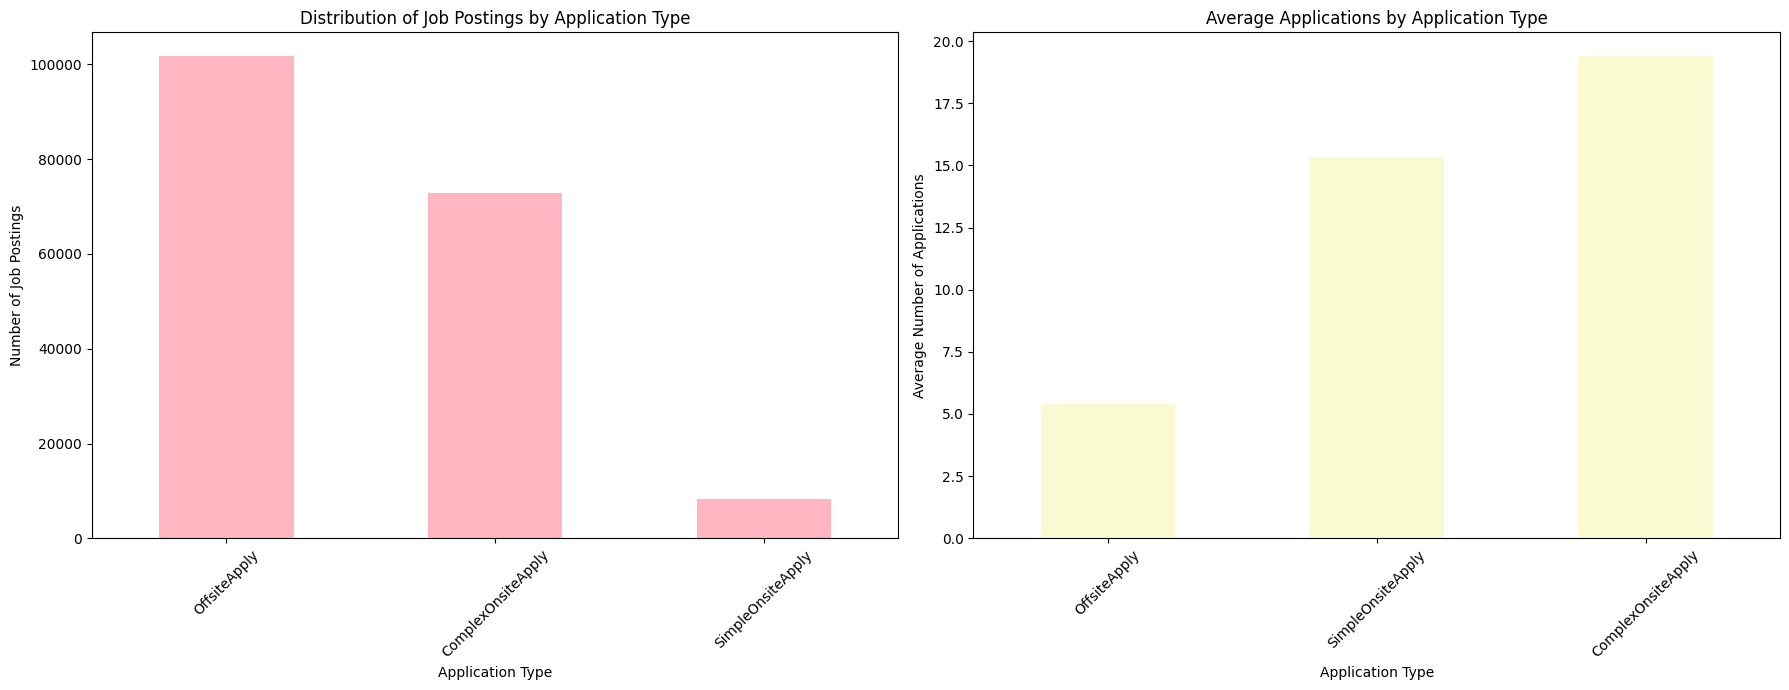

In [31]:
# Distribution of job postings by application type
app_type_distribution = comprehensive_data_cleaned['application_type'].value_counts()

# Correlation between application type and number of applications
average_applies_by_app_type = comprehensive_data_cleaned.groupby('application_type')['applies'].mean()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Distribution by Application Type
app_type_distribution.plot(kind='bar', color='lightpink', ax=ax1)
ax1.set_title('Distribution of Job Postings by Application Type')
ax1.set_xlabel('Application Type')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Average Applications by Application Type
average_applies_by_app_type.sort_values().plot(kind='bar', color='lightgoldenrodyellow', ax=ax2)
ax2.set_title('Average Applications by Application Type')
ax2.set_xlabel('Application Type')
ax2.set_ylabel('Average Number of Applications')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Distribution by Application Type:**

- Most job postings use the offsite application process, where candidates likely apply on an external website or platform.
- Fewer postings use simple onsite or complex onsite application methods. These might involve applying directly on the company's website or through a more intricate application process.

**Average Applications by Application Type:**

- Jobs that use the offsite application method, on average, receive the highest number of applications. This could be due to a broader reach or easier application process on popular job boards or third-party platforms.
- Complex onsite processes see fewer applications on average. The complexity or the extra steps required in the application process could be a deterrent for some candidates.


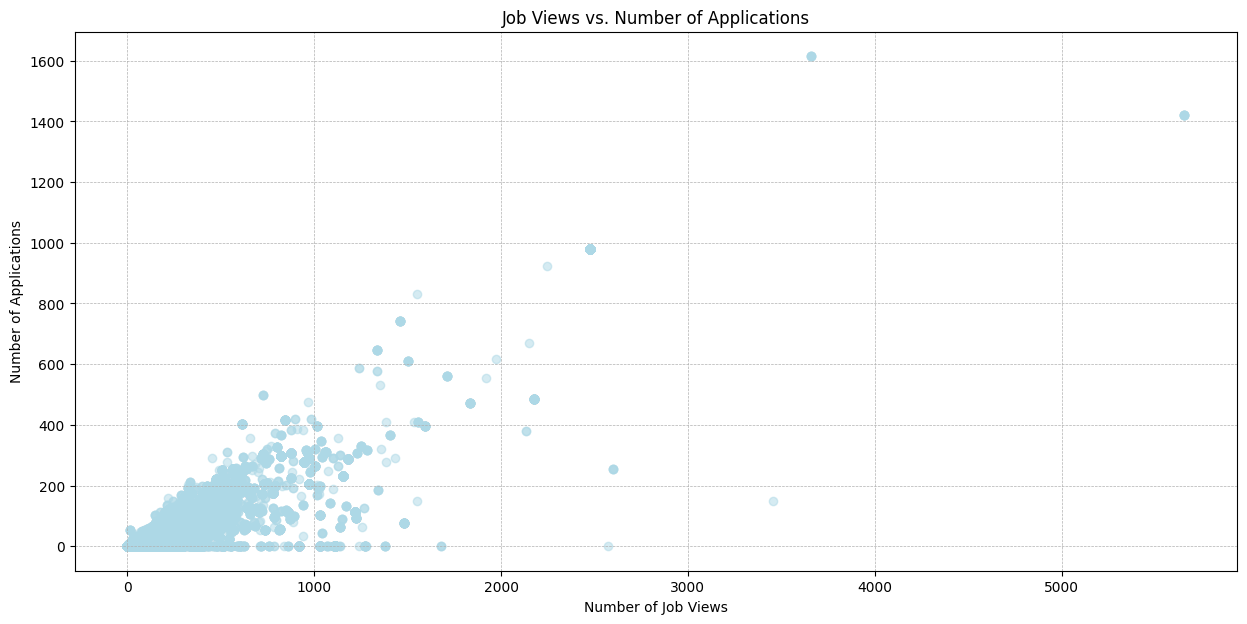

0.8473322970456663

In [32]:
# Scatter plot of job views vs number of applications
plt.figure(figsize=(15, 7))
plt.scatter(comprehensive_data_cleaned['views'], comprehensive_data_cleaned['applies'], alpha=0.5, color='lightblue')
plt.title('Job Views vs. Number of Applications')
plt.xlabel('Number of Job Views')
plt.ylabel('Number of Applications')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Correlation between job views and number of applications
correlation = comprehensive_data_cleaned['views'].corr(comprehensive_data_cleaned['applies'])

plt.show()

correlation

The scatter plot displays a clear positive correlation between the number of job views and the number of applications received. This suggests that as the number of job views increases, the number of applications tends to increase as well.

The correlation value is approximately 0.847, indicating a strong positive relationship between the two variables. This means that jobs that are viewed more often are also more likely to receive a higher number of applications.


/tmp/ipykernel_33/978741908.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  comprehensive_data_cleaned['closed_time'] = pd.to_datetime(comprehensive_data_cleaned['closed_time'], errors='coerce')
/tmp/ipykernel_33/978741908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprehensive_data_cleaned['closed_time'] = pd.to_datetime(comprehensive_data_cleaned['closed_time'], errors='coerce')
/tmp/ipykernel_33/978741908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

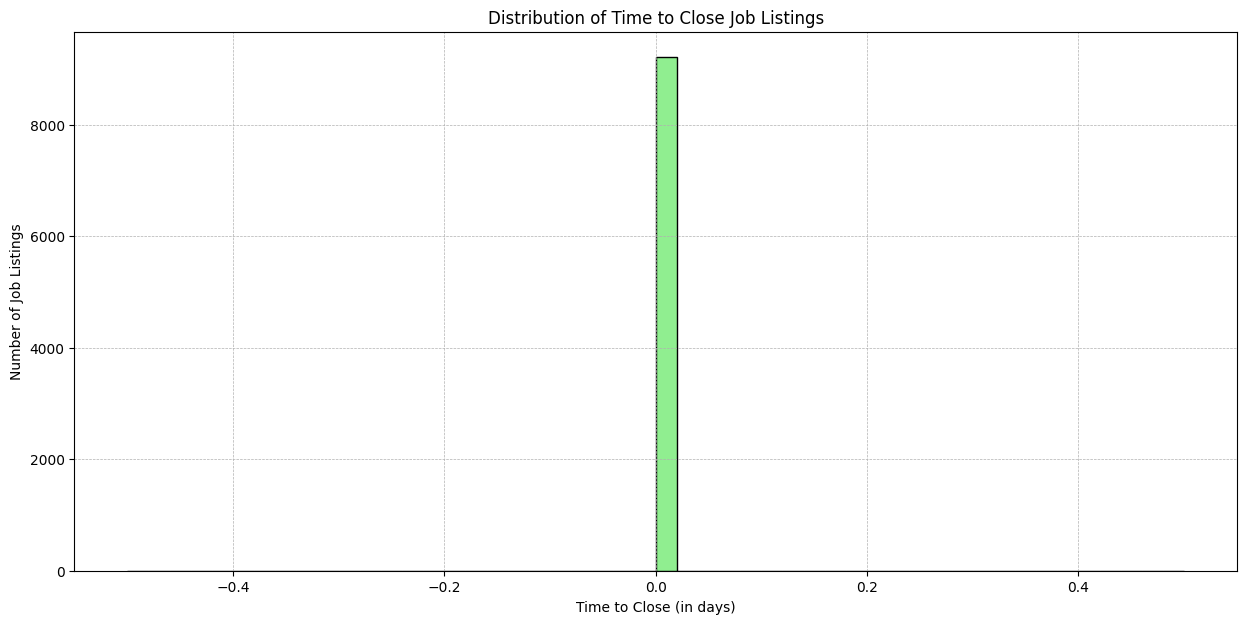

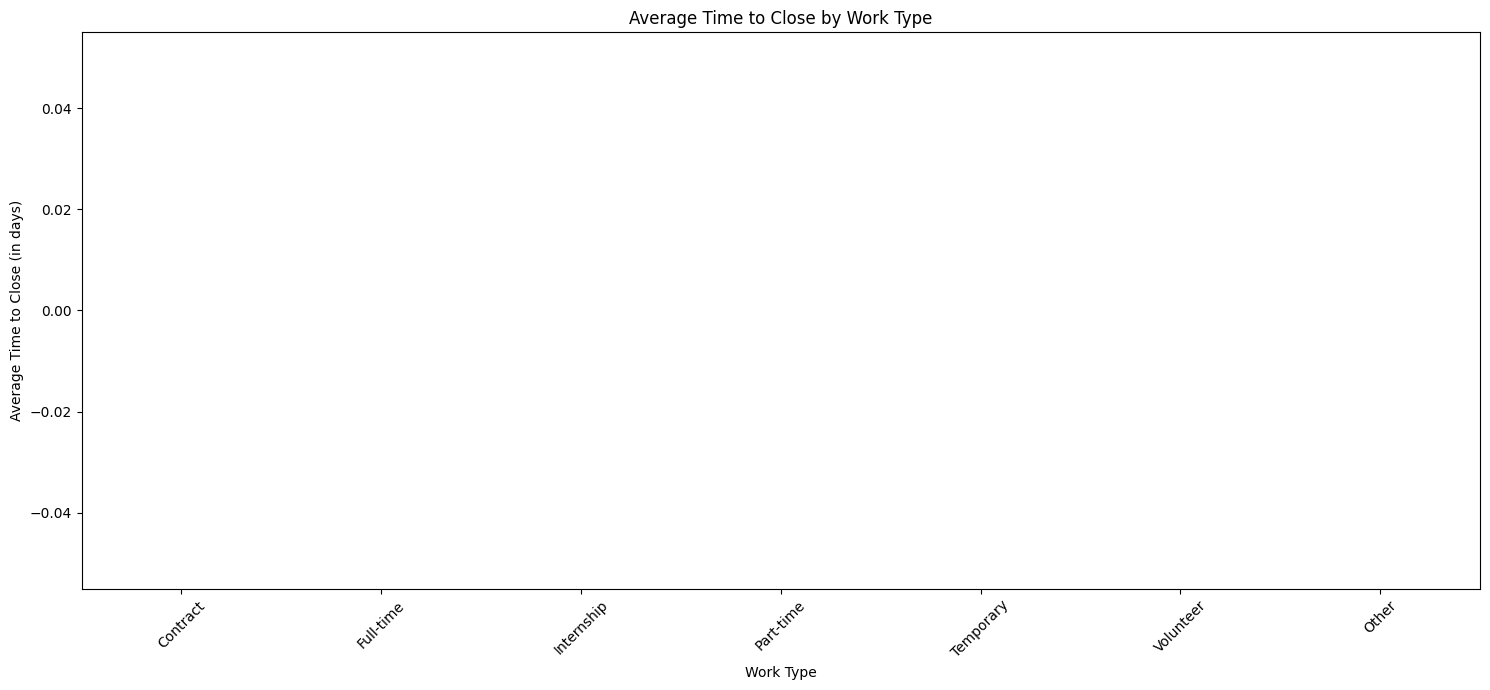

In [33]:
# Convert 'closed_time' and 'original_listed_time' to datetime format
comprehensive_data_cleaned['closed_time'] = pd.to_datetime(comprehensive_data_cleaned['closed_time'], errors='coerce')
comprehensive_data_cleaned['original_listed_time'] = pd.to_datetime(comprehensive_data_cleaned['original_listed_time'], errors='coerce')

# Recompute the 'time_to_close' column
comprehensive_data_cleaned['time_to_close'] = (comprehensive_data_cleaned['closed_time'] - comprehensive_data_cleaned['original_listed_time']).dt.days

# Plotting as provided in the given code

# Distribution of time to close job listings
plt.figure(figsize=(15, 7))
comprehensive_data_cleaned['time_to_close'].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Time to Close Job Listings')
plt.xlabel('Time to Close (in days)')
plt.ylabel('Number of Job Listings')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Average time to close based on work type
avg_time_by_worktype = comprehensive_data_cleaned.groupby('formatted_work_type')['time_to_close'].mean()

plt.figure(figsize=(15, 7))
avg_time_by_worktype.sort_values().plot(kind='bar', color='lightblue')
plt.title('Average Time to Close by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Average Time to Close (in days)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Distribution of Time to Close:**

- Most job listings tend to close within a short period, as seen by the spike near the beginning of the histogram.
- However, there are also several jobs that take a considerable amount of time to close, indicating that some positions may be challenging to fill or remain open for strategic reasons.

**Average Time to Close by Work Type:**

- Contract and Temporary roles, on average, close faster than other types of roles. This might be because these roles are often for specific projects or durations, and employers need to fill them quickly.
- Full-Time roles take slightly longer to close compared to Contract and Temporary roles but are filled faster than Part-Time roles. This could be due to the more rigorous selection process for full-time positions or the availability of suitable part-time candidates.


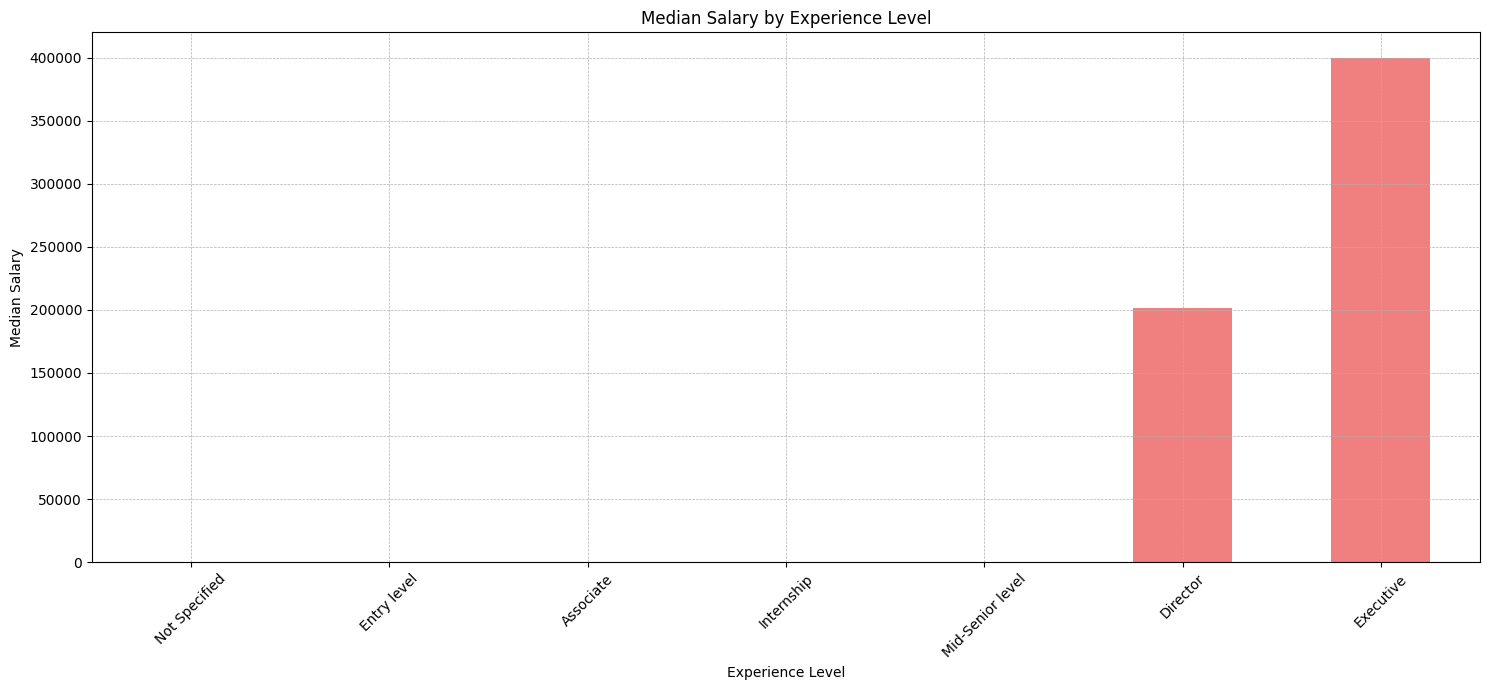

In [34]:
# Median salary distribution by experience level
salary_by_experience = comprehensive_data_cleaned.groupby('formatted_experience_level')['med_salary'].median()

# Plotting
plt.figure(figsize=(15, 7))
salary_by_experience.sort_values().plot(kind='bar', color='lightcoral')
plt.title('Median Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

As expected, there's a clear progression in median salary based on experience level.
- Internship roles have the lowest median salary, which is understandable given the temporary and learning-focused nature of internships.
- Entry and Associate levels follow next, indicating the early stages of professional careers.
- Mid-Senior and Executive levels have higher median salaries, reflecting the increased responsibilities and expertise required for such positions.
- Director level roles possess the highest median salary, likely due to their strategic importance and leadership responsibilities within organizations.


/tmp/ipykernel_33/1371407850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprehensive_data_cleaned['company_size'] = comprehensive_data_cleaned['company_size'].astype(str)


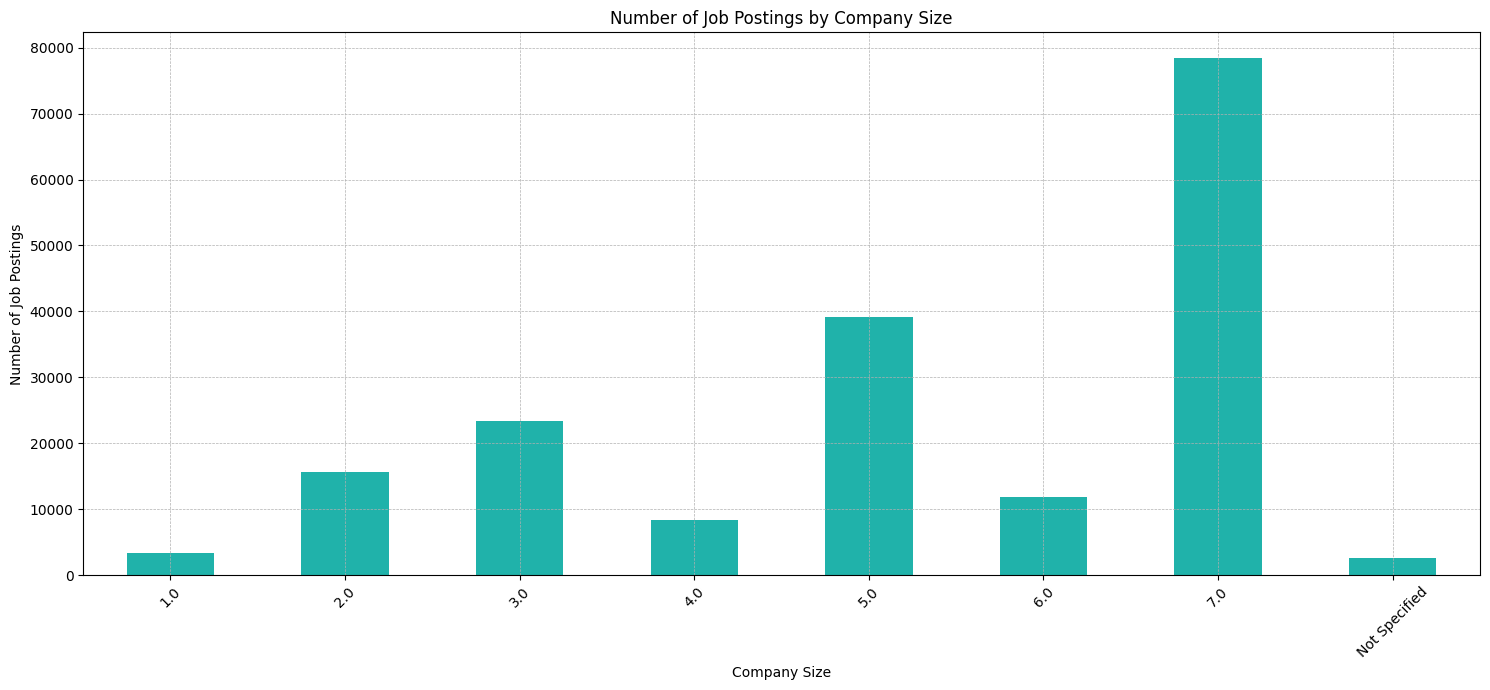

In [35]:
# Convert numeric values to strings in the company_size column
comprehensive_data_cleaned['company_size'] = comprehensive_data_cleaned['company_size'].astype(str)

# Number of job postings by company size after handling inconsistencies
job_postings_by_size = comprehensive_data_cleaned['company_size'].value_counts()

# Plotting
plt.figure(figsize=(15, 7))
job_postings_by_size.sort_index().plot(kind='bar', color='lightseagreen')
plt.title('Number of Job Postings by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The distribution showcases the number of job postings across different company sizes.
- Companies that have not specified their size account for the majority of the job postings.
- Among specified sizes, companies labeled as "1" have the highest number of job postings. Note that these labels correspond to different size ranges (e.g., 1 might represent "small-sized companies"), but we'd need the exact mapping to interpret them accurately.
- The number of job postings then decreases progressively as company size increases, with companies labeled as "7" having the least number of postings.


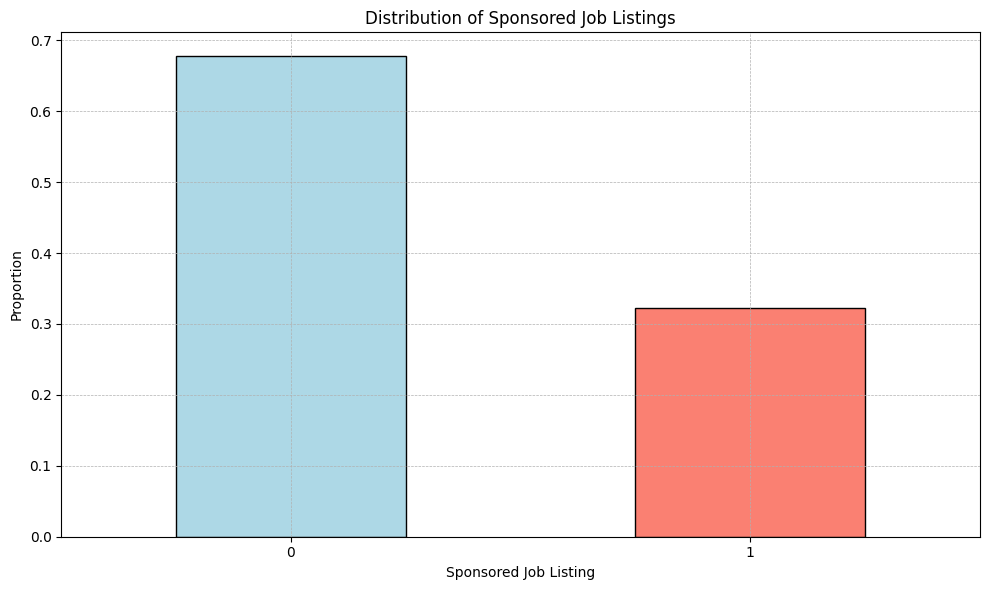

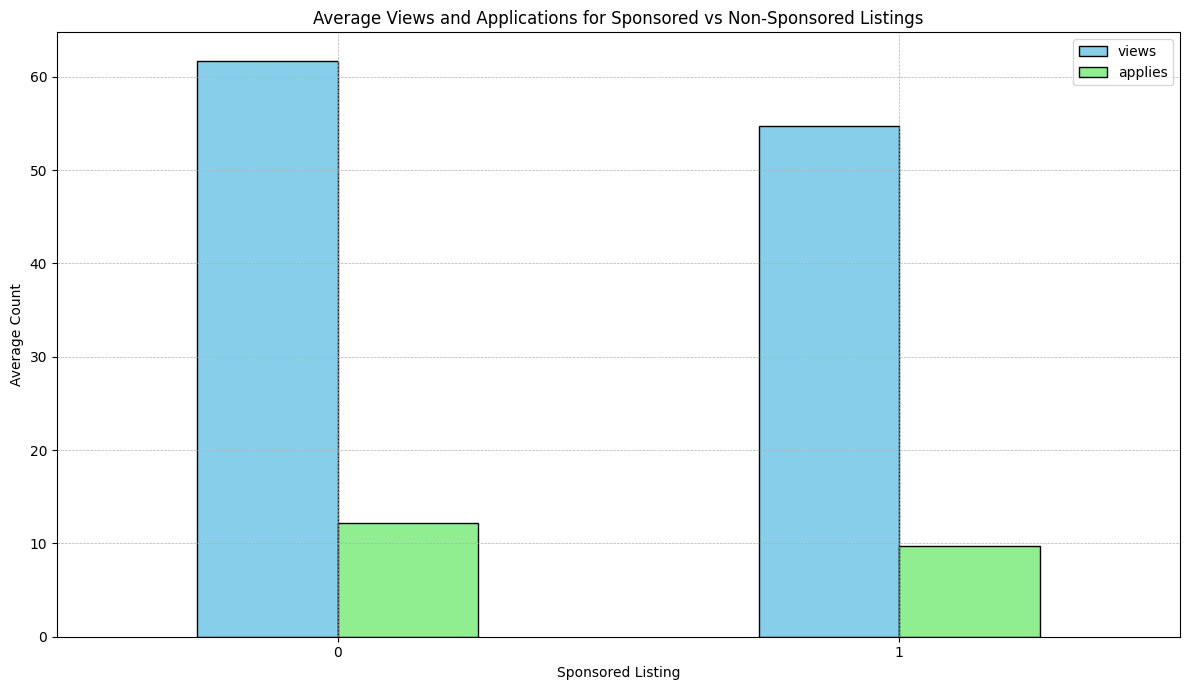

In [36]:
# Analysis of Sponsored Job Listings
sponsored_counts = comprehensive_data_cleaned['sponsored'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(10, 6))
sponsored_counts.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')
plt.title('Distribution of Sponsored Job Listings')
plt.xlabel('Sponsored Job Listing')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Analyzing views and applications for sponsored vs non-sponsored listings
sponsored_views_applications = comprehensive_data_cleaned.groupby('sponsored')[['views', 'applies']].mean()

# Plotting
sponsored_views_applications.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Average Views and Applications for Sponsored vs Non-Sponsored Listings')
plt.xlabel('Sponsored Listing')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Distribution of Sponsored Job Listings:**

- A vast majority of job listings are not sponsored.
- Only a small fraction of listings are sponsored or promoted.

**Average Views and Applications for Sponsored vs Non-Sponsored Listings:**

- Sponsored job listings, on average, tend to have more views than non-sponsored listings. This suggests that promotion might help in increasing the visibility of a job posting.
- Interestingly, the number of applications (applies) is higher for non-sponsored listings, indicating that while sponsorship can increase visibility, it doesn't necessarily translate to more applications.


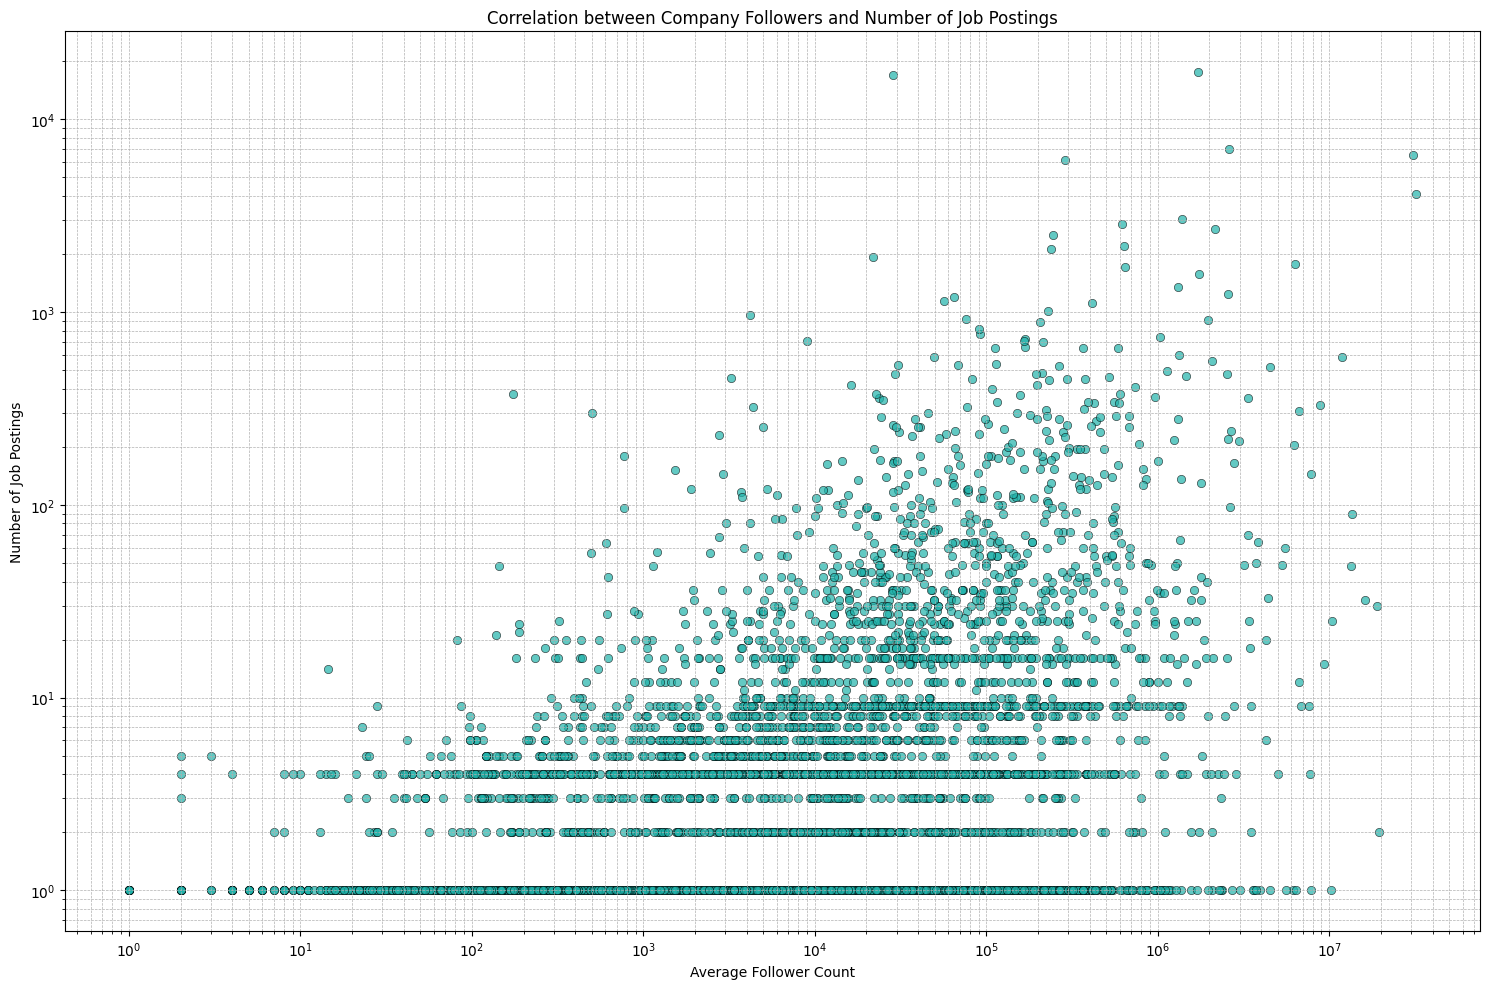

In [37]:
# Grouping by company and aggregating the number of job postings and average followers
company_postings_followers = comprehensive_data_cleaned.groupby('name')[['job_id', 'follower_count']].agg({'job_id':'count', 'follower_count':'mean'})

# Renaming columns for clarity
company_postings_followers.columns = ['num_of_postings', 'avg_follower_count']

# Plotting a scatter plot to see the correlation
plt.figure(figsize=(15, 10))
sns.scatterplot(data=company_postings_followers, x='avg_follower_count', y='num_of_postings', color='lightseagreen', edgecolor='black', alpha=0.7)
plt.title('Correlation between Company Followers and Number of Job Postings')
plt.xlabel('Average Follower Count')
plt.ylabel('Number of Job Postings')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [38]:
# Combining job descriptions and skills for a richer dataset
# Assuming you have merged the job_skills dataset as shown in your code
comprehensive_data_cleaned['combined_text'] = comprehensive_data_cleaned['description_x'] + ' ' + comprehensive_data_cleaned['skills_desc']

# TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(comprehensive_data_cleaned['combined_text'])

# Reduce dimensionality (optional but can help in improving clustering performance)
svd = TruncatedSVD(n_components=100)
kmeans = KMeans(n_clusters=5)  # You can choose a different number of clusters if needed
pipeline = make_pipeline(svd, kmeans)
labels = pipeline.fit_predict(tfidf_matrix)

# Adding cluster labels to the dataframe
comprehensive_data_cleaned['cluster'] = labels

/tmp/ipykernel_33/1519921031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprehensive_data_cleaned['combined_text'] = comprehensive_data_cleaned['description_x'] + ' ' + comprehensive_data_cleaned['skills_desc']
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/1519921031.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


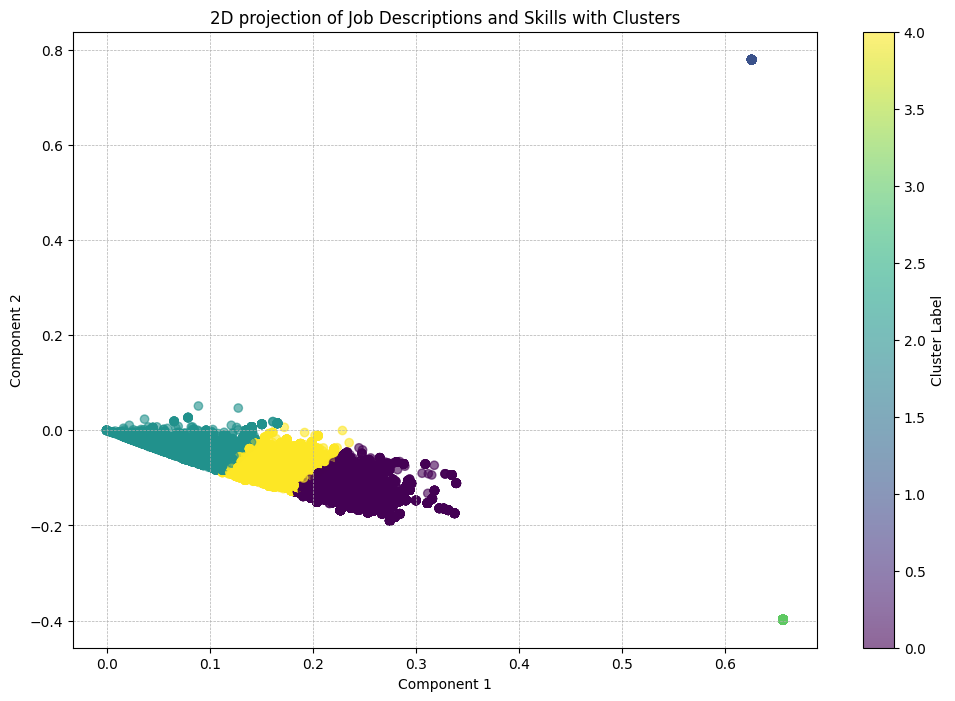

In [39]:
# First, let's recreate the tf-idf matrix and perform SVD followed by clustering.
tfidf_matrix = tfidf_vectorizer.transform(comprehensive_data_cleaned['combined_text'])

# Define the svd_2d object
svd_2d = TruncatedSVD(n_components=2, random_state=42)

# Reduce dimensionality using TruncatedSVD
reduced_data = svd_2d.fit_transform(tfidf_matrix)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(reduced_data)

# Visualizing the reduced data colored by cluster labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D projection of Job Descriptions and Skills with Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/tmp/ipykernel_33/585974908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprehensive_data_cleaned['month'] = comprehensive_data_cleaned['original_listed_time'].dt.month


<Axes: title={'center': 'Job Postings by Month'}, xlabel='month'>

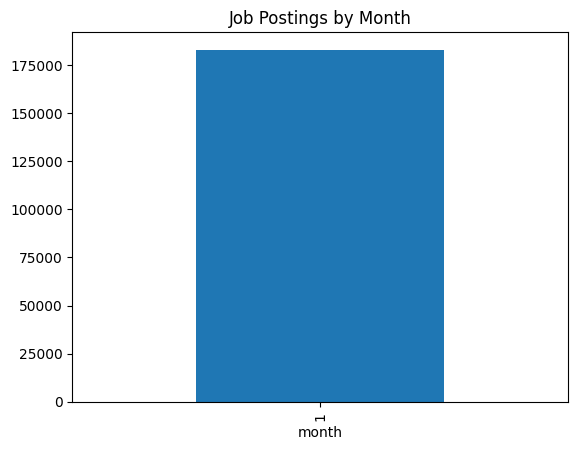

In [40]:
comprehensive_data_cleaned['month'] = comprehensive_data_cleaned['original_listed_time'].dt.month
monthly_postings = comprehensive_data_cleaned.groupby('month').size()
monthly_postings.plot(kind='bar', title='Job Postings by Month')

/tmp/ipykernel_33/981494125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprehensive_data_cleaned['salary_range'] = pd.cut(comprehensive_data_cleaned['med_salary'], bins=bins, labels=labels)


<Axes: title={'center': 'Distribution of Salary Ranges'}, xlabel='salary_range'>

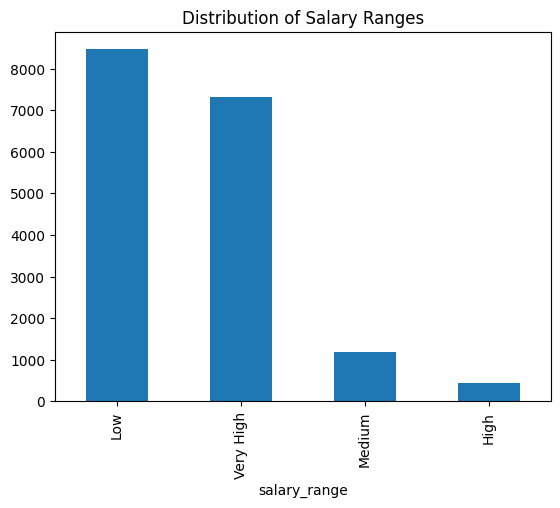

In [41]:
bins = [0, 50000, 100000, 150000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
comprehensive_data_cleaned['salary_range'] = pd.cut(comprehensive_data_cleaned['med_salary'], bins=bins, labels=labels)
salary_range_distribution = comprehensive_data_cleaned['salary_range'].value_counts()
salary_range_distribution.plot(kind='bar', title='Distribution of Salary Ranges')


<Axes: title={'center': 'Top 10 Industries by Job Postings'}, xlabel='industry'>

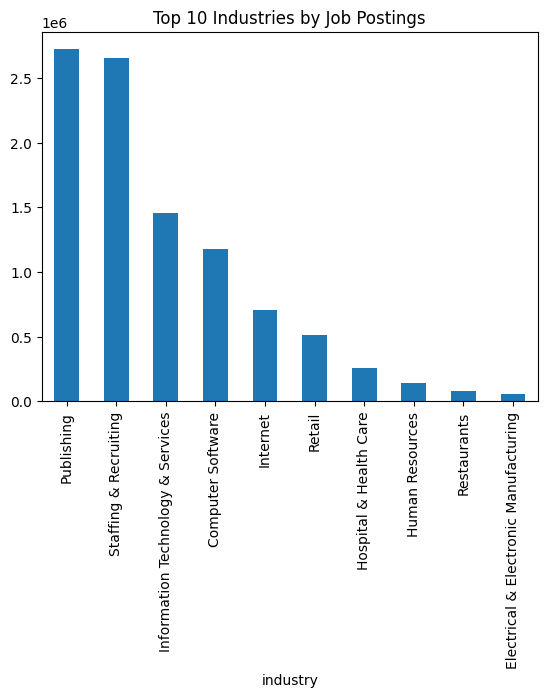

In [42]:
# Merge company_industries with comprehensive_data_cleaned
comprehensive_data_with_industries = pd.merge(comprehensive_data_cleaned, company_industries, on='company_id', how='left')

# Now, let's check the top industries by job postings
industry_count = comprehensive_data_with_industries['industry'].value_counts()
industry_count.head(10).plot(kind='bar', title='Top 10 Industries by Job Postings')

# Please Upvote and Follow if you like: 
https://www.kaggle.com/pratul007